In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn import set_config
set_config(transform_output='pandas')
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. Data/Domain Understanding and Exploration**

## **1.1. Meaning and Type of Features**

In [3]:
at = pd.read_csv("/content/drive/MyDrive/ML Dataset/adverts.csv")

In [4]:
at.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,2.020060e+14,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,2.020070e+14,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,2.020070e+14,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,2.020070e+14,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,2.020070e+14,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [5]:
at.tail()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
402000,2.020100e+14,5179.0,69,Grey,Peugeot,208,USED,2019.0,10595,Hatchback,False,Petrol
402001,2.020100e+14,110000.0,59,Red,Peugeot,107,USED,2009.0,2000,Hatchback,False,Petrol
402002,2.020100e+14,52760.0,62,White,Nissan,Qashqai,USED,2012.0,7250,SUV,False,Petrol
402003,2.020110e+14,10250.0,65,Red,Abarth,595,USED,2015.0,11490,Hatchback,False,Petrol
402004,2.015120e+14,14000.0,14,Silver,Audi,A4 Avant,USED,2014.0,20520,Estate,False,Diesel


In [6]:
at.sample(3)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
227255,2.020070e+14,10000.0,18,Silver,Honda,Jazz,USED,2018.0,11995,Hatchback,False,Petrol
58721,2.020080e+14,16608.0,16,Purple,DS AUTOMOBILES,DS 3 CABRIO,USED,2016.0,8300,Convertible,False,Petrol
143859,2.020070e+14,101905.0,57,Silver,Mercedes-Benz,GL Class,USED,2007.0,7500,SUV,False,Diesel


In [7]:
at.shape

(402005, 12)

In [8]:
at.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  float64
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(7)
memory usage: 34.1+ MB


In [9]:
columns = {
    "public_reference": "It shows a unique identifier for the car",
    "mileage": "It tells the total distance a car has travelled.",
    "reg_code": "This is the registration code of the car.",
    "standard_colour": "The color of the car.",
    "standard_make": "The brand of the car like Audi, BMW.",
    "standard_model": "The specific model of the car like A5 of Audi.",
    "vehicle_condition": "The new or used condition of the car.",
    "year_of_registration": "The registration year of the car.",
    "price": "The price of the car.",
    "body_type": "Vehicle body type like sedan, SUV, hatchback.",
    "crossover_car_and_van": "It displays if the vehicle is a crossover.",
    "fuel_type": "It shows fuel type that car uses like petrol."
}

table = pd.DataFrame({
    "Data Type": at.dtypes,
    "Description": [columns[col] for col in at.columns]
})

table

,Data Type,Description
public_reference,float64,It shows a unique identifier for the car
mileage,float64,It tells the total distance a car has travelled.
reg_code,object,This is the registration code of the car.
standard_colour,object,The color of the car.
standard_make,object,"The brand of the car like Audi, BMW."
standard_model,object,The specific model of the car like A5 of Audi.
vehicle_condition,object,The new or used condition of the car.
year_of_registration,float64,The registration year of the car.
price,int64,The price of the car.
body_type,object,"Vehicle body type like sedan, SUV, hatchback."


### **Analysis of Distribution**

Text(0.5, 0, 'Price')

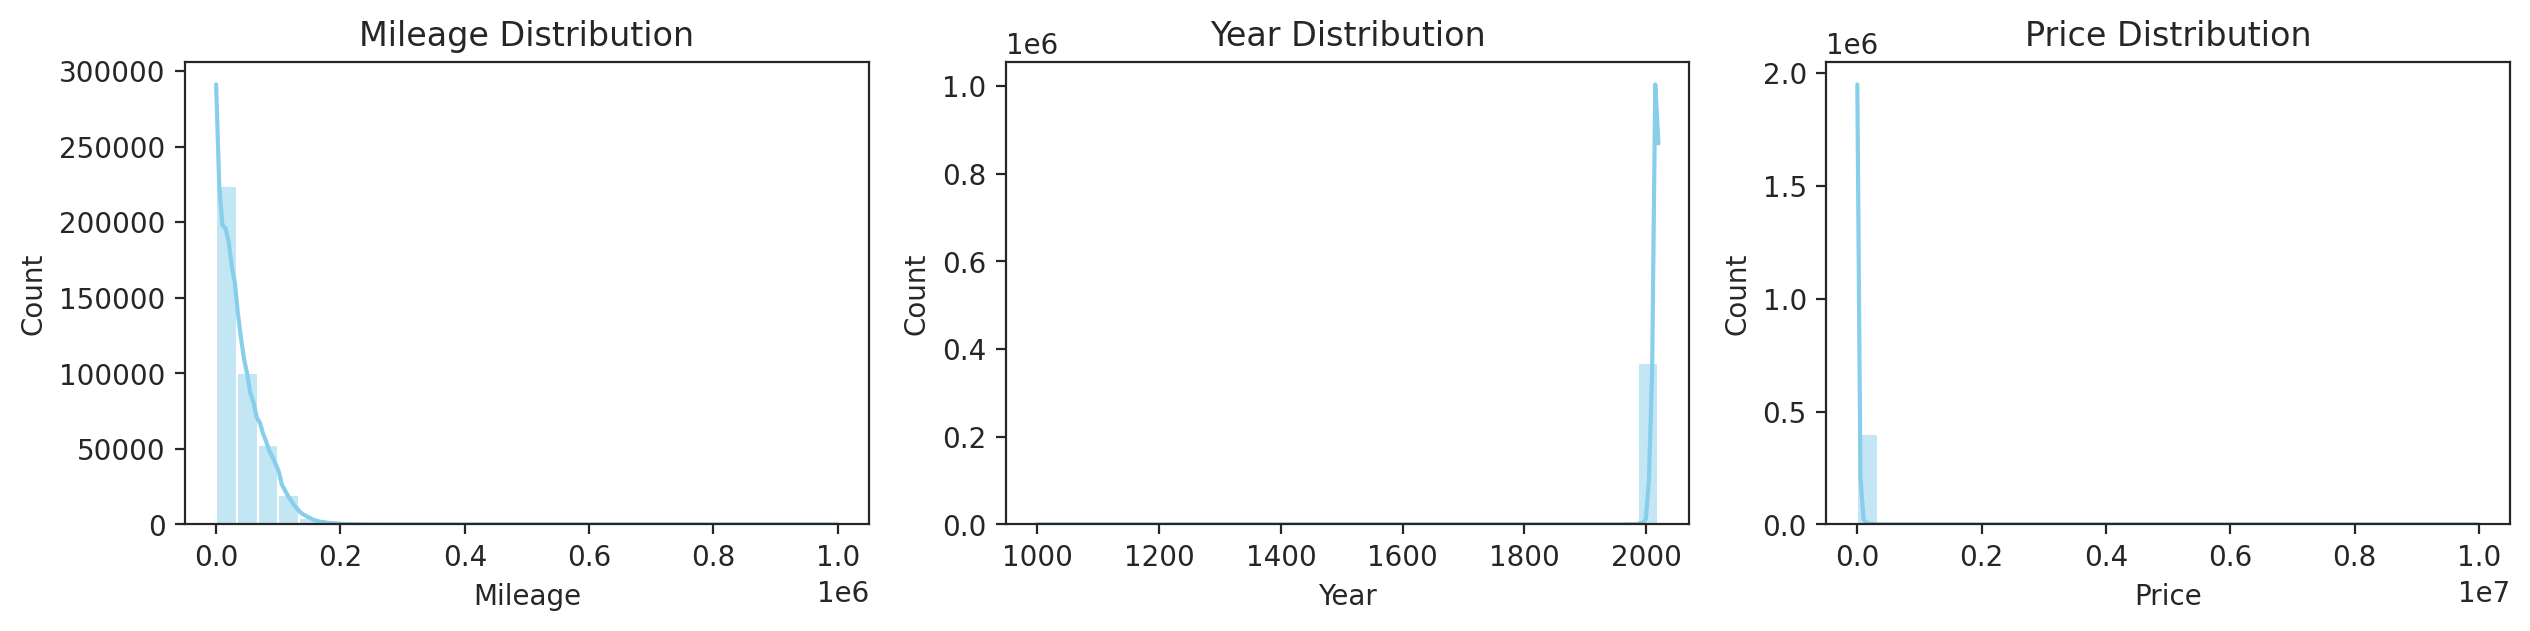

In [10]:
plt.figure(figsize=(15, 3))
plt.subplot(1, 3, 1)
sns.histplot(at['mileage'], kde=True, color='skyblue', bins=30)
plt.title('Mileage Distribution')
plt.xlabel('Mileage')

plt.subplot(1, 3, 2)
sns.histplot(at['year_of_registration'], kde=True, color='skyblue', bins=30)
plt.title('Year Distribution')
plt.xlabel('Year')

plt.subplot(1, 3, 3)
sns.histplot(at['price'], kde=True, color='skyblue', bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')

In [11]:
mileage_skewness = at['mileage'].skew()
year_skewness = at['year_of_registration'].skew()
price_skewness = at['price'].skew()
print(f"Skewness of Mileage, Year and Price: {mileage_skewness, year_skewness, price_skewness}")

Skewness of Mileage, Year and Price: (1.4511319838597931, -87.90995439028659, 154.68152711899864)


Text(0.5, 0, 'Vehicle Condition')

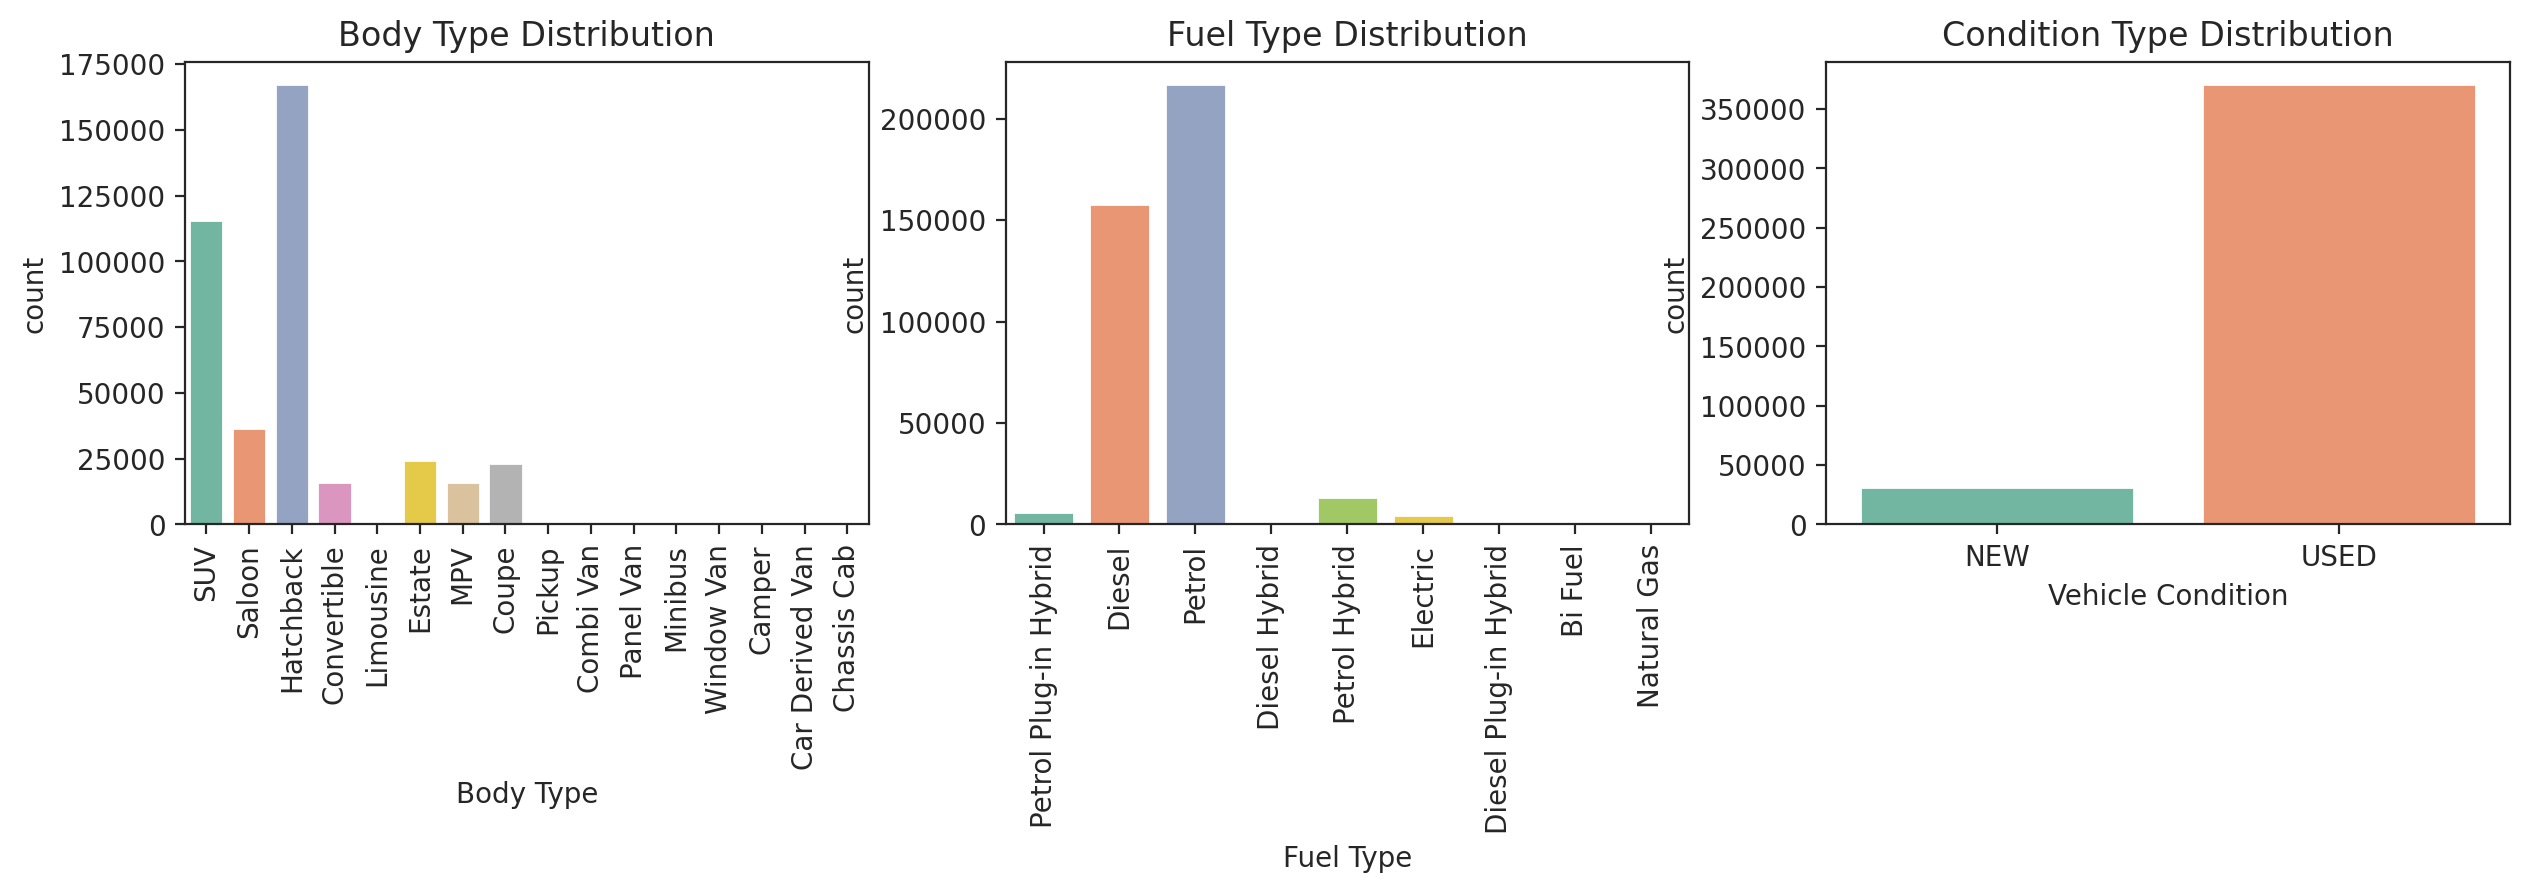

In [12]:
plt.figure(figsize=(15, 3))
plt.subplot(1, 3, 1)
sns.countplot(data=at, x='body_type', palette='Set2')
plt.title('Body Type Distribution')
plt.xlabel('Body Type')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
sns.countplot(data=at, x='fuel_type', palette='Set2')
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
sns.countplot(data=at, x='vehicle_condition', palette='Set2')
plt.title('Condition Type Distribution')
plt.xlabel('Vehicle Condition')

## **1.2 Analysis of Predictive Power of Features**

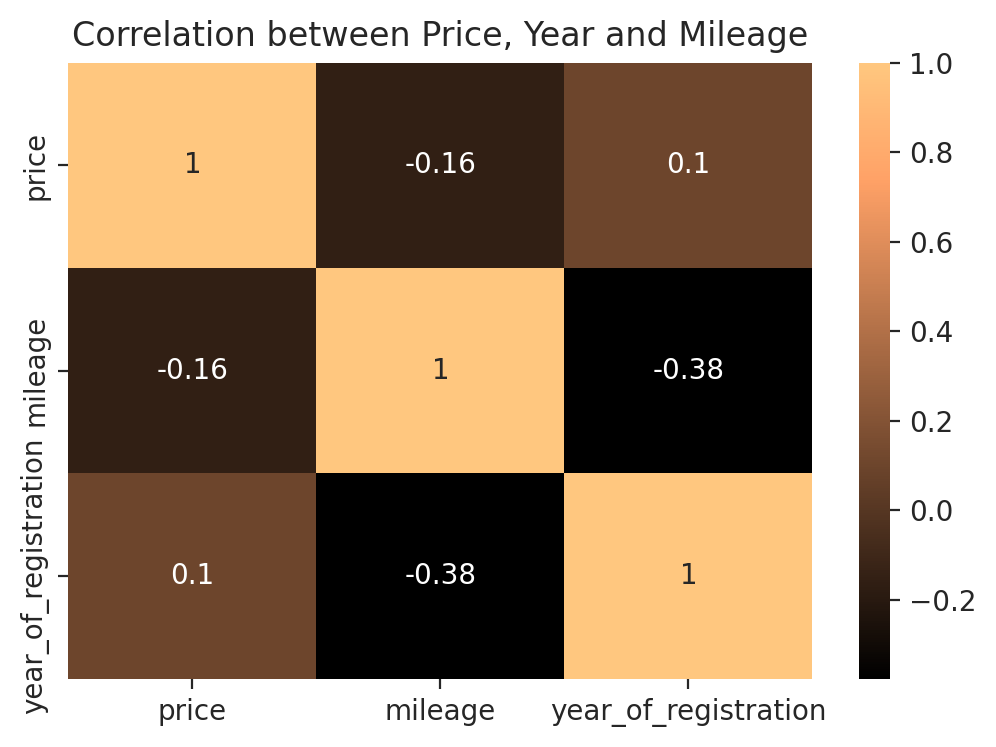

In [13]:
cor_matrix = at[['price', 'mileage', 'year_of_registration']].corr()
sns.heatmap(cor_matrix, annot=True, cmap='copper')
plt.title('Correlation between Price, Year and Mileage')
plt.show()

Text(0, 0.5, 'Price')

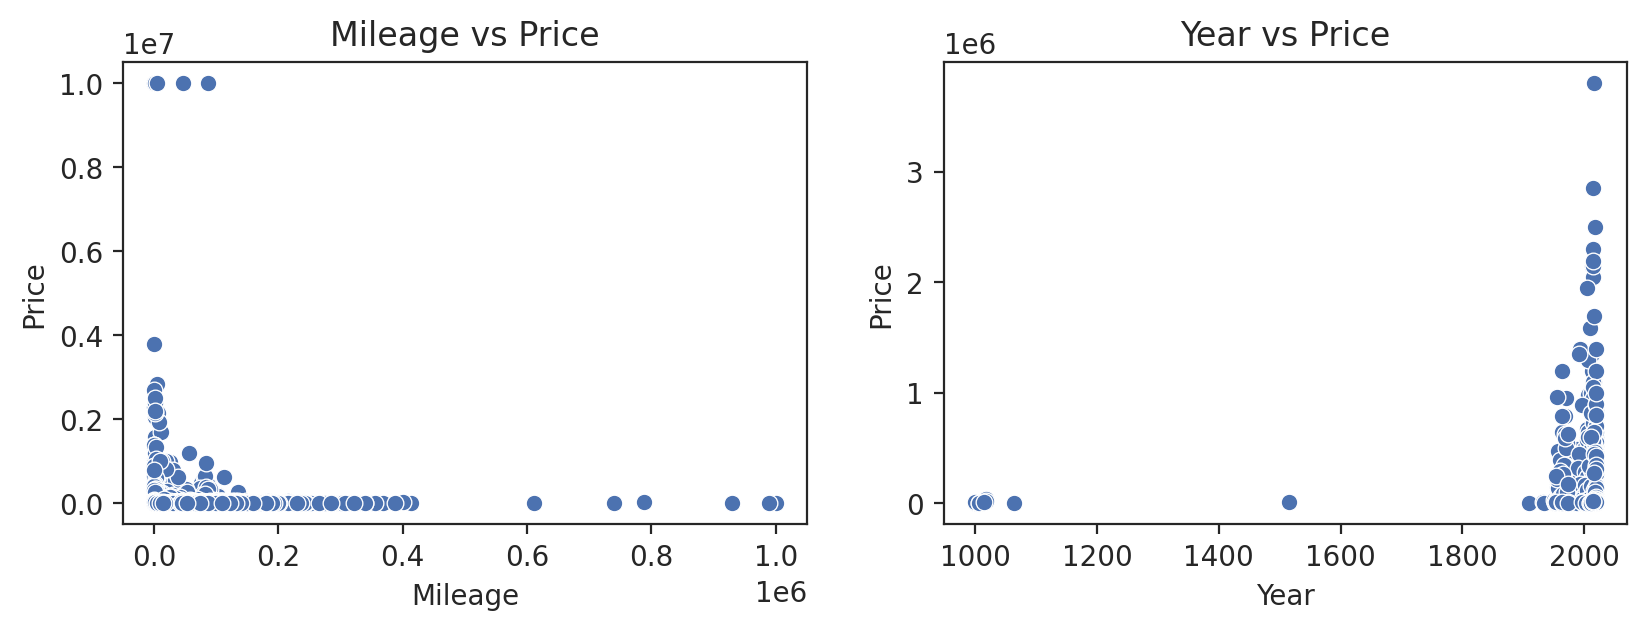

In [14]:
plt.figure(figsize=(15, 3))
plt.subplot(1, 3, 1)
sns.scatterplot(x=at['mileage'], y=at['price'], data=at)
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')

plt.subplot(1, 3, 2)
sns.scatterplot(x=at['year_of_registration'], y=at['price'], data=at)
plt.title('Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'Grey'),
  Text(1, 0, 'Blue'),
  Text(2, 0, 'Brown'),
  Text(3, 0, 'Red'),
  Text(4, 0, 'Bronze'),
  Text(5, 0, 'Black'),
  Text(6, 0, 'White'),
  Text(7, 0, 'Silver'),
  Text(8, 0, 'Purple'),
  Text(9, 0, 'Green'),
  Text(10, 0, 'Orange'),
  Text(11, 0, 'Yellow'),
  Text(12, 0, 'Turquoise'),
  Text(13, 0, 'Gold'),
  Text(14, 0, 'Multicolour'),
  Text(15, 0, 'Beige'),
  Text(16, 0, 'Burgundy'),
  Text(17, 0, 'Pink'),
  Text(18, 0, 'Maroon'),
  Text(19, 0, 'Magenta'),
  Text(20, 0, 'Navy'),
  Text(21, 0, 'Indigo')])

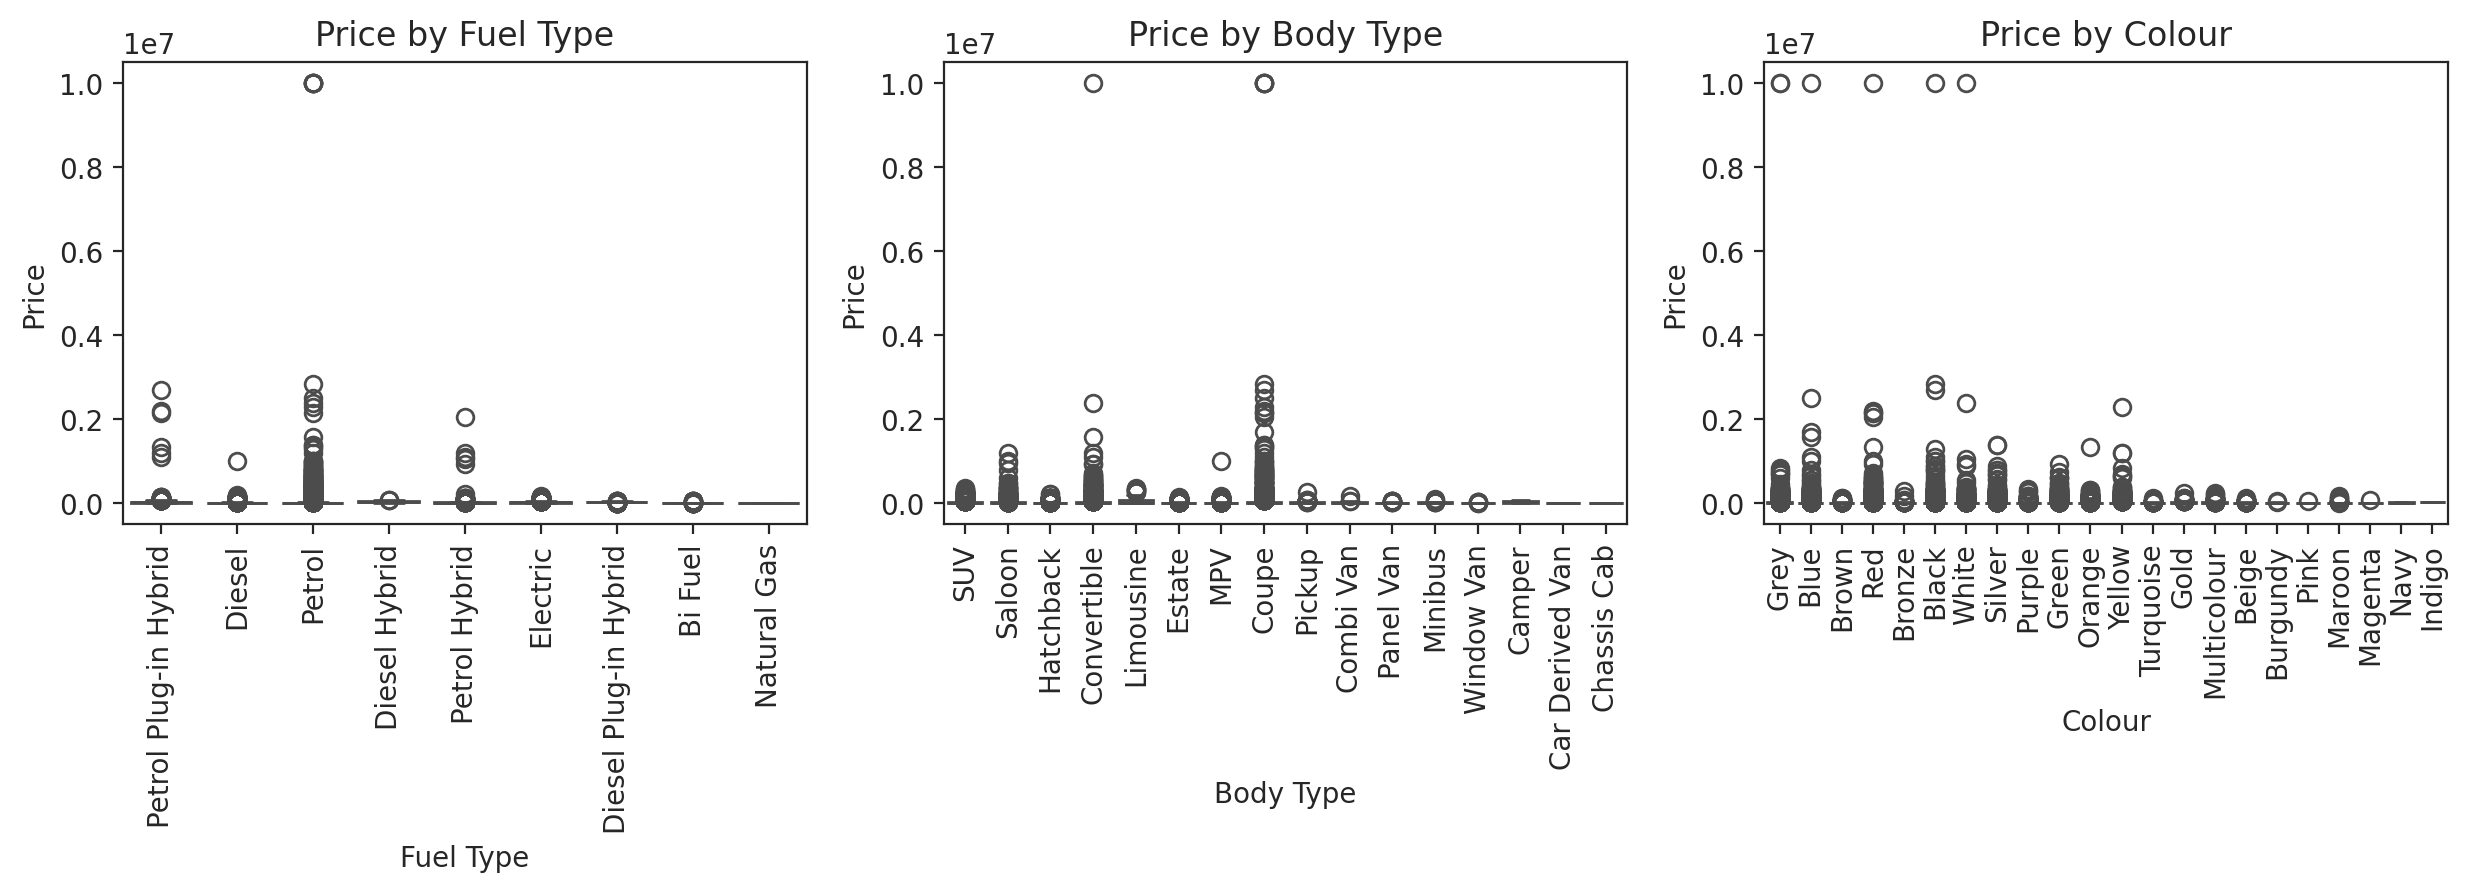

In [15]:
plt.figure(figsize=(15, 3))
plt.subplot(1, 3, 1)
sns.boxplot(x='fuel_type', y='price', data=at)
plt.title('Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
sns.boxplot(x='body_type', y='price', data=at)
plt.title('Price by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Price')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
sns.boxplot(x='standard_colour', y='price', data=at)
plt.title('Price by Colour')
plt.xlabel('Colour')
plt.ylabel('Price')
plt.xticks(rotation=90)



## **1.3. Data Processing for Data Exploration and Visualisation**

In [16]:
at.describe()

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020069e+14,37743.595656,2015.006206,1.734197e+04
std,1.691466e+10,34831.724018,7.962667,4.643746e+04
min,2.013070e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020090e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020100e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


In [17]:
at.describe(include='object')

,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,body_type,fuel_type
count,370148,396627,402005,402005,402005,401168,401404
unique,72,22,110,1168,2,16,9
top,17,Black,BMW,Golf,USED,Hatchback,Petrol
freq,36738,86287,37376,11583,370756,167315,216929


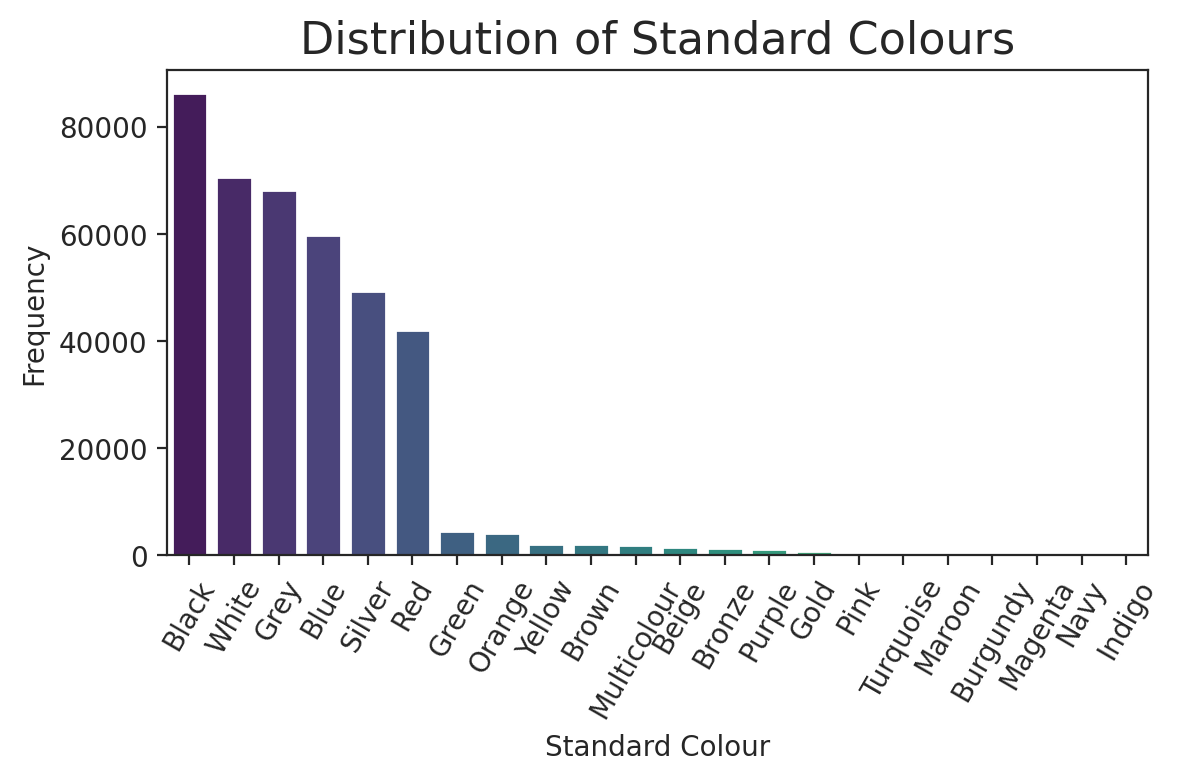

In [18]:
colour_counts = at['standard_colour'].value_counts()
sns.barplot(x=colour_counts.index, y=colour_counts.values, palette='viridis')
plt.title('Distribution of Standard Colours', fontsize=16)
plt.xlabel('Standard Colour')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()


In [19]:
at.isnull().sum()

,0
public_reference,0
mileage,127
reg_code,31857
standard_colour,5378
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,33311
price,0
body_type,837


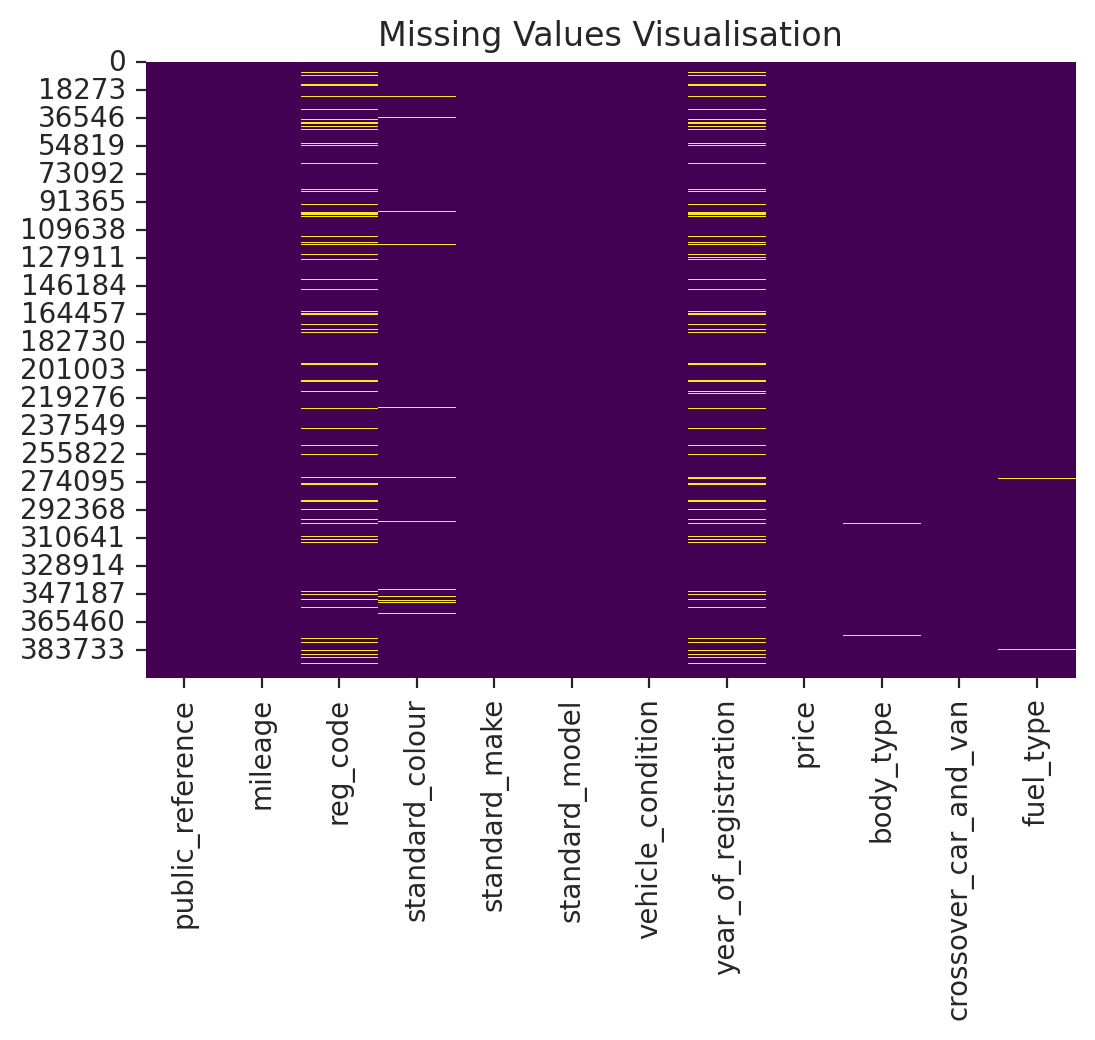

In [20]:
sns.heatmap(at.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Visualisation")
plt.show()

# **2. Data Processing for Machine Learning**

## **2.1. Dealing with Missing Values, Outliers, and Noise**

In [21]:
at.isnull().sum()

,0
public_reference,0
mileage,127
reg_code,31857
standard_colour,5378
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,33311
price,0
body_type,837


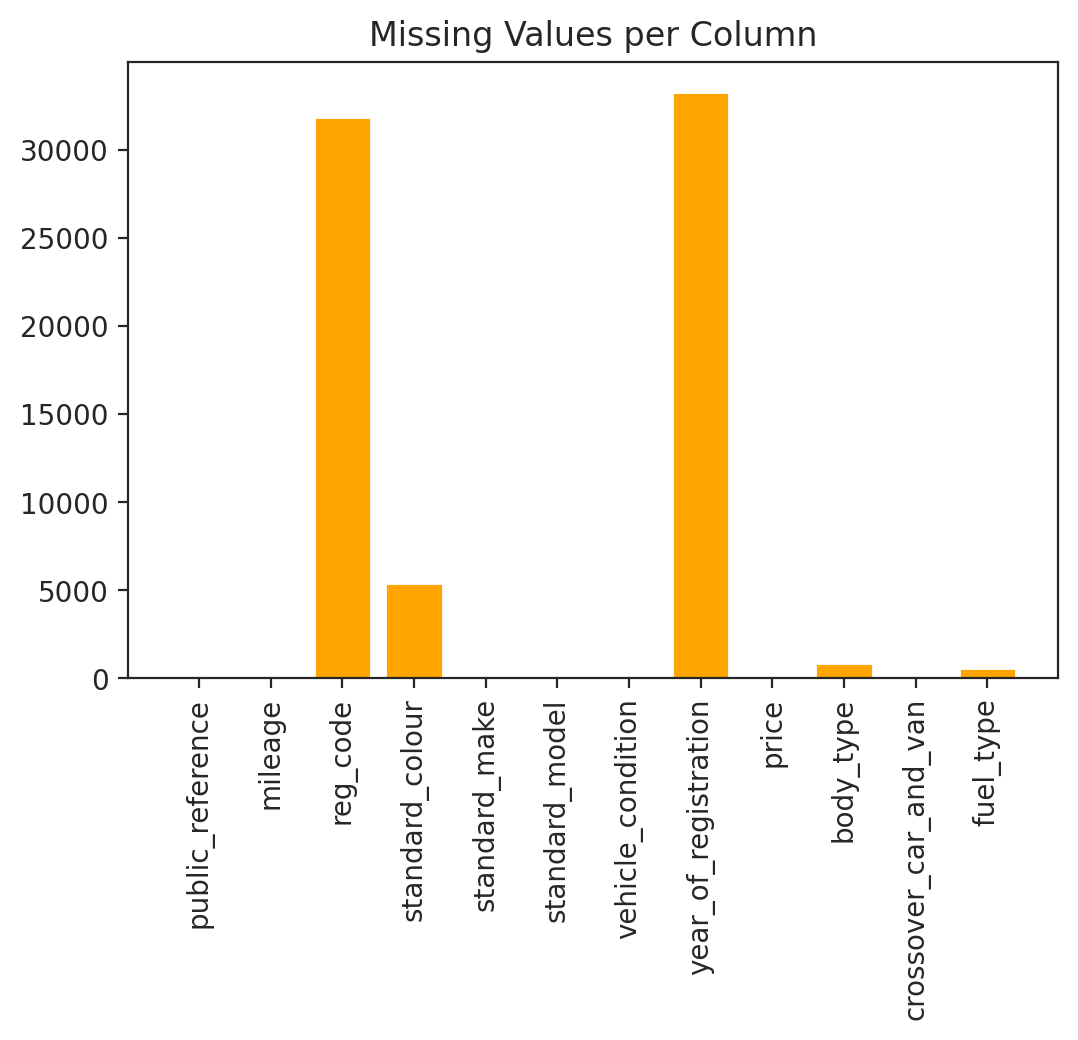

In [22]:
missing_val_num = at.isnull().sum()
val_plot = plt.bar(missing_val_num.index, missing_val_num, color='orange')
plt.title("Missing Values per Column")
plt.xticks(rotation=90)
plt.show()

**Dealing with missing mileage**

In [23]:
missing_mileage_count = at['mileage'].isnull().sum()
missing_mileage_count

127

In [24]:
#getting the mean of mileage and then fill missing values with the mean
mean_of_mileage = at['mileage'].mean()
print(mean_of_mileage)

37743.59565589557


In [25]:
any_new_car_missing_mileage = at[at['mileage'].isnull() & at['vehicle_condition'] == 'NEW']
print(any_new_car_missing_mileage)

Empty DataFrame
Columns: [public_reference, mileage, reg_code, standard_colour, standard_make, standard_model, vehicle_condition, year_of_registration, price, body_type, crossover_car_and_van, fuel_type]
Index: []


In [26]:
mis_mil_dt = at[at['mileage'].isnull()]
mis_mil_dt

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
4766,2.020030e+14,NaN,NaN,Grey,Subaru,Outback,USED,NaN,35995,Estate,False,Petrol
9178,2.020100e+14,NaN,20,Blue,BMW,3 Series,USED,2020.0,36990,Saloon,False,Diesel Hybrid
11188,2.020090e+14,NaN,9,Red,Citroen,C1,USED,2009.0,2699,Hatchback,False,Petrol
17166,2.020090e+14,NaN,15,Silver,Audi,A5 Cabriolet,USED,2015.0,13495,Convertible,False,Petrol
17416,2.020080e+14,NaN,NaN,Grey,SKODA,Octavia,USED,NaN,25085,Estate,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
391833,2.020100e+14,NaN,67,Grey,Audi,A7,USED,2017.0,28590,Hatchback,False,Diesel
395579,2.020100e+14,NaN,63,Blue,Kia,Venga,USED,2013.0,5995,Hatchback,False,Diesel
396360,2.020080e+14,NaN,12,Black,Citroen,C4,USED,2012.0,5999,Hatchback,False,Petrol
396367,2.020080e+14,NaN,6,Silver,Volkswagen,Polo,USED,2006.0,1399,Hatchback,False,Petrol


In [27]:
at['mileage'].fillna(round(mean_of_mileage), inplace=True)

In [28]:
at.head(4768)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,2.020060e+14,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,2.020070e+14,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,2.020070e+14,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,2.020070e+14,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,2.020070e+14,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...
4763,2.020030e+14,10571.0,18,Red,Toyota,Yaris,USED,2018.0,13895,Hatchback,False,Petrol
4764,2.020030e+14,14840.0,68,Grey,Renault,Captur,USED,2019.0,10109,SUV,False,Petrol
4765,2.020030e+14,13284.0,67,White,BMW,i3,USED,2017.0,22450,Hatchback,False,Petrol Hybrid
4766,2.020030e+14,37744.0,NaN,Grey,Subaru,Outback,USED,NaN,35995,Estate,False,Petrol


**Dealing with missing year of registration**

In [29]:
missing_year_count = at['year_of_registration'].isnull().value_counts()
missing_year_count

,count
year_of_registration,
False,368694
True,33311


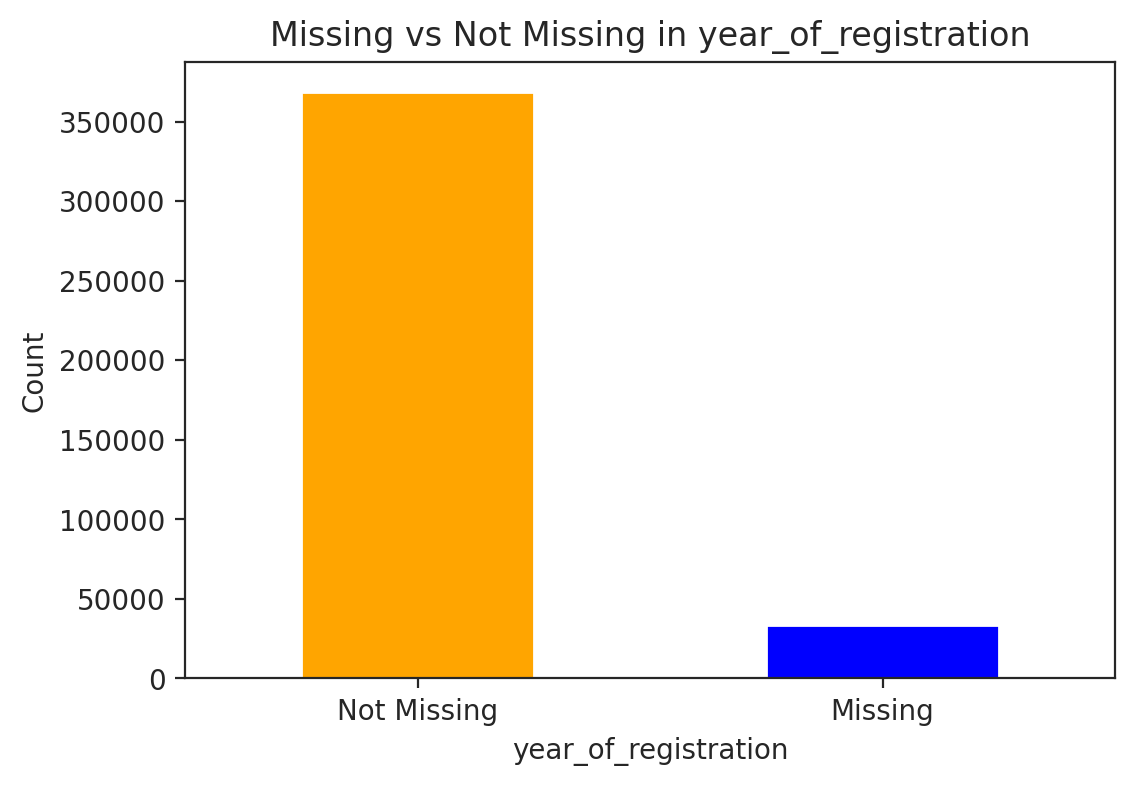

In [30]:
missing_year_count.plot(kind='bar', color=['orange', 'blue'])
plt.xticks([0, 1], ['Not Missing', 'Missing'], rotation=0)
plt.title('Missing vs Not Missing in year_of_registration')
plt.ylabel('Count')
plt.show()

In [31]:
missing_years_by_cond = at.loc[at['year_of_registration'].isnull(), 'vehicle_condition'].value_counts()
print(missing_years_by_cond)

vehicle_condition
NEW     31249
USED     2062
Name: count, dtype: int64


In [32]:
#checking the mileage of NEW cars before filling year
new_cars_mileage = at[(at['vehicle_condition'] == 'NEW') & (at['year_of_registration'].isna())].sort_values(by='mileage', ascending=True)['mileage']
print(new_cars_mileage)

0           0.0
227190      0.0
227170      0.0
227123      0.0
227040      0.0
          ...  
245783    100.0
302473    100.0
13058     100.0
246397    100.0
65285     100.0
Name: mileage, Length: 31249, dtype: float64


In [33]:
#filling missing year of new cars with max year because all new cars have no regcode as well, so we only have to fill them with max year
# and their mileage is also between 0 to 100
max_year = at['year_of_registration'].max()
max_year

2020.0

In [34]:
mis_year_with_new_car = (at['vehicle_condition'] == 'NEW') & (at['year_of_registration'].isnull())
at.loc[mis_year_with_new_car, 'year_of_registration'] = max_year
missing_years_by_condi = at.loc[at['year_of_registration'].isnull(), 'vehicle_condition'].value_counts()
print(missing_years_by_condi)

vehicle_condition
USED    2062
Name: count, dtype: int64


In [35]:
#we only left with 2062 missing values for year with USED vehicles
#we will use their regcode to fill the mising years

at['reg_code'] = pd.to_numeric(at['reg_code'], errors='coerce')
reg_code_to_year = {
    51: 2001, 52: 2002, 53: 2003, 54: 2004, 55: 2005, 56: 2006,
    57: 2007, 58: 2008, 59: 2009, 60: 2010, 61: 2011, 62: 2012,
    63: 2013, 64: 2014, 65: 2015, 66: 2016, 67: 2017, 68: 2018,
    69: 2019, 70: 2020
}
years_with_regcode = at['year_of_registration'].isnull() & at['reg_code'].isin(reg_code_to_year.keys())
at.loc[years_with_regcode, 'year_of_registration'] = at.loc[years_with_regcode, 'reg_code'].map(reg_code_to_year)

In [36]:
missing_years_by_condit = at.loc[at['year_of_registration'].isnull(), 'vehicle_condition'].value_counts()
print(missing_years_by_condit)

vehicle_condition
USED    1185
Name: count, dtype: int64


In [37]:
#we are left with 1185 missing values for years with USED vehicles
#we will again fill the years using regcode from 2 to 20

reg_code_from_march = {
    2: 2002, 3: 2003, 4: 2004, 5: 2005, 6: 2006, 7: 2007, 8: 2008, 9: 2009, 10: 2010, 11: 2011, 12: 2012, 13: 2013, 14: 2014, 15: 2015,
    16: 2016, 17: 2017, 18: 2018, 19: 2019, 20: 2020
}
years_with_march_regcode = at['year_of_registration'].isnull() & at['reg_code'].isin(reg_code_from_march.keys())
at.loc[years_with_march_regcode, 'year_of_registration'] = at.loc[years_with_march_regcode, 'reg_code'].map(reg_code_from_march)

In [38]:
missing_years_by_conditi = at.loc[at['year_of_registration'].isnull(), 'vehicle_condition'].value_counts()
print(missing_years_by_conditi)

vehicle_condition
USED    378
Name: count, dtype: int64


In [39]:
#we are now left with only 378 missing values of years, so we will fill them with mode
mode_of_year = at['year_of_registration'].mode()[0]
at['year_of_registration'].fillna(mode_of_year, inplace=True)

In [40]:
mis_val_in_year = at['year_of_registration'].isna().sum()
mis_val_in_year

0

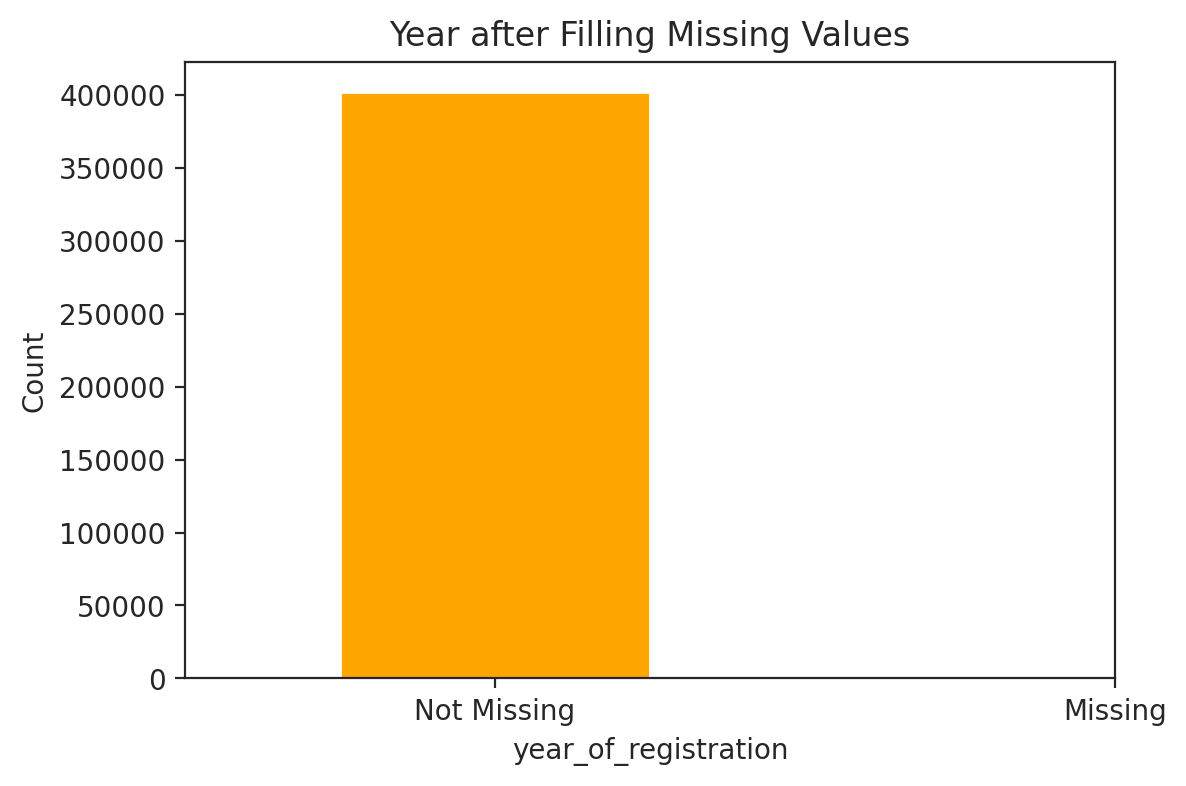

In [41]:
at['year_of_registration'].isna().value_counts().plot(kind='bar', color=['orange', 'blue'])
plt.xticks([0, 1], ['Not Missing', 'Missing'], rotation=0)
plt.title('Year after Filling Missing Values')
plt.ylabel('Count')
plt.show()

**Dealing with noisy values in vehicle condition**

In [42]:
#As we have some cars whose mileage is zero, year is 2020 but condition is USED. So, we wil change their condition to NEW

new_Cars = at[(at['mileage'] == 0) & (at['vehicle_condition'] == 'NEW')].shape[0]
print(f"Current number of NEW cars: {new_Cars}")

used_car_mileage = at[(at['mileage'] == 0) & (at['vehicle_condition'] == 'USED') & (at['year_of_registration'] == 2020)].shape[0]
print(f"Number of cars to be updated to 'NEW' condition: {used_car_mileage}")


Current number of NEW cars: 15852
Number of cars to be updated to 'NEW' condition: 312


In [43]:
cond_to_new = at.loc[(at['mileage'] == 0) & (at['vehicle_condition'] == 'USED') & (at['year_of_registration'] == 2020 ), 'vehicle_condition'] = "NEW"
rows_to_new = at[(at['mileage'] == 0) & (at['vehicle_condition'] == 'NEW') & (at['year_of_registration'] == 2020)].shape[0]
print(f"Updated number of 'NEW' car condition: {rows_to_new}")

Updated number of 'NEW' car condition: 16164


**Dealing with noisy values in mileage**

In [44]:
#we have some vehicles who mileage is 0, condition is USED between the year 1972 to 2019.
#So we will give them mean mileage

mileage_with_mean = at.loc[(at['mileage'] == 0) & (at['vehicle_condition'] == 'USED') & (at['year_of_registration'] >= 1973) & (at['year_of_registration'] <= 2019), 'mileage'] = mean_of_mileage

In [45]:
print (at.loc[(at['mileage'] == 0) & (at['vehicle_condition'] == 'USED') & (at['year_of_registration'] >= 1973) & (at['year_of_registration'] <= 2019)].value_counts())

Series([], Name: count, dtype: int64)


**Dealing with missing values of fuel_type**

In [46]:
fuel_miss = at['fuel_type'].isnull().value_counts()
fuel_miss

,count
fuel_type,
False,401404
True,601


In [47]:
#stats before filling missing value
at['fuel_type'].value_counts()

,count
fuel_type,
Petrol,216929
Diesel,158120
Petrol Hybrid,13602
Petrol Plug-in Hybrid,6160
Electric,4783
Diesel Hybrid,1403
Bi Fuel,221
Diesel Plug-in Hybrid,185
Natural Gas,1


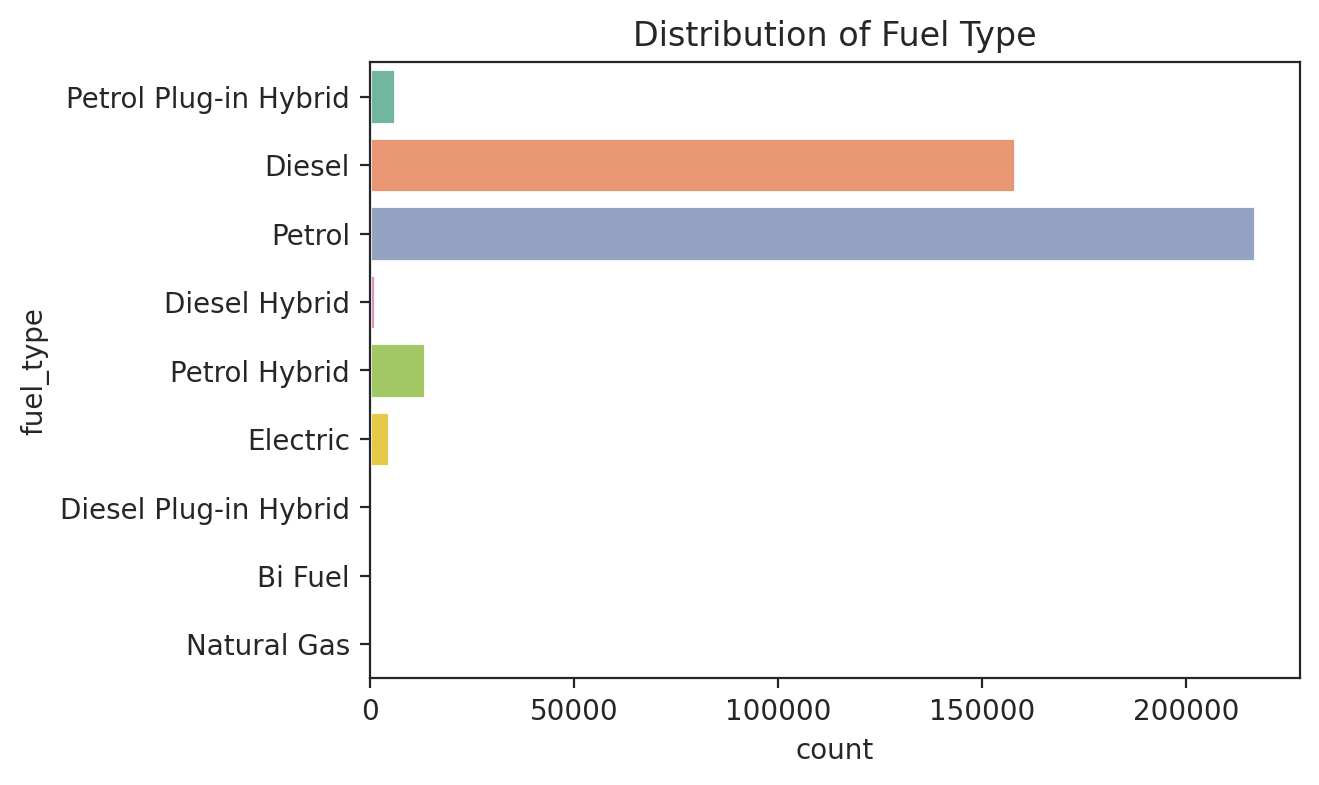

In [48]:
sns.countplot(y=at['fuel_type'], data=at, palette = "Set2")
plt.title("Distribution of Fuel Type")
plt.show()

In [49]:
#checking the percentage of distribution
fuel_dist = at['fuel_type'].value_counts(normalize=True)
fuel_dist

,proportion
fuel_type,
Petrol,0.540426
Diesel,0.393917
Petrol Hybrid,0.033886
Petrol Plug-in Hybrid,0.015346
Electric,0.011916
Diesel Hybrid,0.003495
Bi Fuel,0.000551
Diesel Plug-in Hybrid,0.000461
Natural Gas,0.000002


In [50]:
fuel_missing_num = at['fuel_type'].isna().sum()
values_filling = np.random.choice(fuel_dist.index, size=fuel_missing_num, p=fuel_dist.values)
at.loc[at['fuel_type'].isna(), 'fuel_type'] = values_filling

In [51]:
#stats after filling missing values based on distribution
at['fuel_type'].value_counts()

,count
fuel_type,
Petrol,217238
Diesel,158364
Petrol Hybrid,13626
Petrol Plug-in Hybrid,6165
Electric,4799
Diesel Hybrid,1406
Bi Fuel,221
Diesel Plug-in Hybrid,185
Natural Gas,1


In [52]:
fuel_mis = at['fuel_type'].isnull().value_counts()
fuel_mis

,count
fuel_type,
False,402005


**Dealing with missing values of body_type**

In [53]:
body_miss = at['body_type'].isnull().value_counts()
body_miss

,count
body_type,
False,401168
True,837


In [54]:
#stats before filling missing value
at['body_type'].value_counts()

,count
body_type,
Hatchback,167315
SUV,115872
Saloon,36641
Estate,24692
Coupe,23258
Convertible,16038
MPV,16026
Pickup,620
Combi Van,214


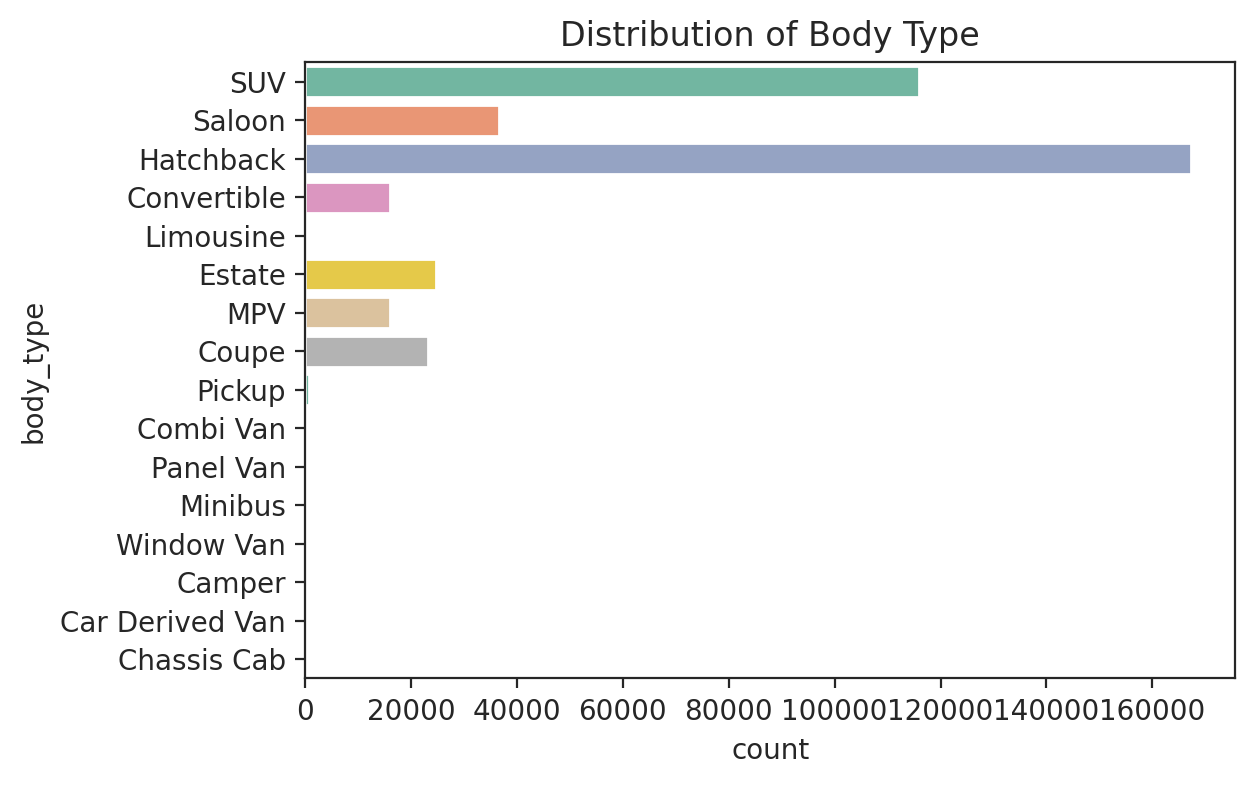

In [55]:
sns.countplot(y=at['body_type'], data=at, palette = "Set2")
plt.title("Distribution of Body Type")
plt.show()

In [56]:
#checking the percentage of distribution
bodytype_dist = at['body_type'].value_counts(normalize=True)
bodytype_dist

,proportion
body_type,
Hatchback,0.417070
SUV,0.288837
Saloon,0.091336
Estate,0.061550
Coupe,0.057976
Convertible,0.039978
MPV,0.039948
Pickup,0.001545
Combi Van,0.000533


In [57]:
body_missing_num = at['body_type'].isna().sum()
body_values_filling = np.random.choice(bodytype_dist.index, size=body_missing_num, p=bodytype_dist.values)
at.loc[at['body_type'].isna(), 'body_type'] = body_values_filling

In [58]:
#stats after filling missing values based on distribution
at['body_type'].value_counts()

,count
body_type,
Hatchback,167644
SUV,116134
Saloon,36714
Estate,24741
Coupe,23303
MPV,16074
Convertible,16063
Pickup,623
Combi Van,214


In [59]:
body_mis = at['body_type'].isnull().value_counts()
body_mis

,count
body_type,
False,402005


**Dealing with missing values of standard_color**

In [60]:
colour_miss = at['standard_colour'].isnull().value_counts()
colour_miss

,count
standard_colour,
False,396627
True,5378


In [61]:
#stats before filling missing value
at['standard_colour'].value_counts()

,count
standard_colour,
Black,86287
White,70535
Grey,68227
Blue,59784
Silver,49323
Red,42024
Green,4534
Orange,4088
Yellow,2097


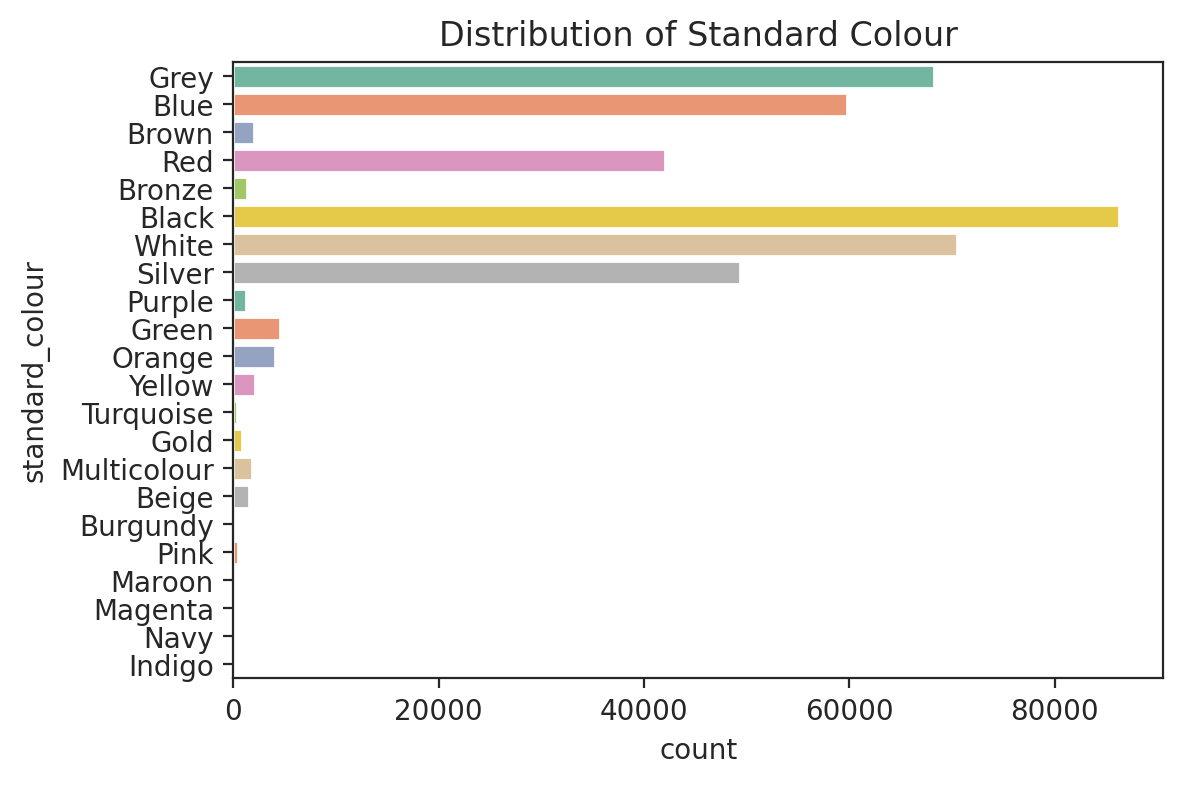

In [62]:
sns.countplot(y=at['standard_colour'], data=at, palette = "Set2")
plt.title("Distribution of Standard Colour")
plt.show()

In [63]:
#checking the percentage of distribution
colour_dist = at['standard_colour'].value_counts(normalize=True)
colour_dist

,proportion
standard_colour,
Black,0.217552
White,0.177837
Grey,0.172018
Blue,0.150731
Silver,0.124356
Red,0.105953
Green,0.011431
Orange,0.010307
Yellow,0.005287


In [64]:
colour_missing_num = at['standard_colour'].isna().sum()
colour_values_filling = np.random.choice(colour_dist.index, size=colour_missing_num, p=colour_dist.values)
at.loc[at['standard_colour'].isna(), 'standard_colour'] = colour_values_filling

In [65]:
#stats after filling missing values based on distribution
at['standard_colour'].value_counts()

,count
standard_colour,
Black,87407
White,71501
Grey,69148
Blue,60612
Silver,49984
Red,42621
Green,4592
Orange,4154
Yellow,2121


In [66]:
colour_mis = at['standard_colour'].isnull().value_counts()
colour_mis

,count
standard_colour,
False,402005


In [67]:
at.isnull().sum()

,0
public_reference,0
mileage,0
reg_code,34772
standard_colour,0
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,0
price,0
body_type,0


**Outliers Handling of Mileage and Distribution**

Text(0.5, 0, 'Mileage')

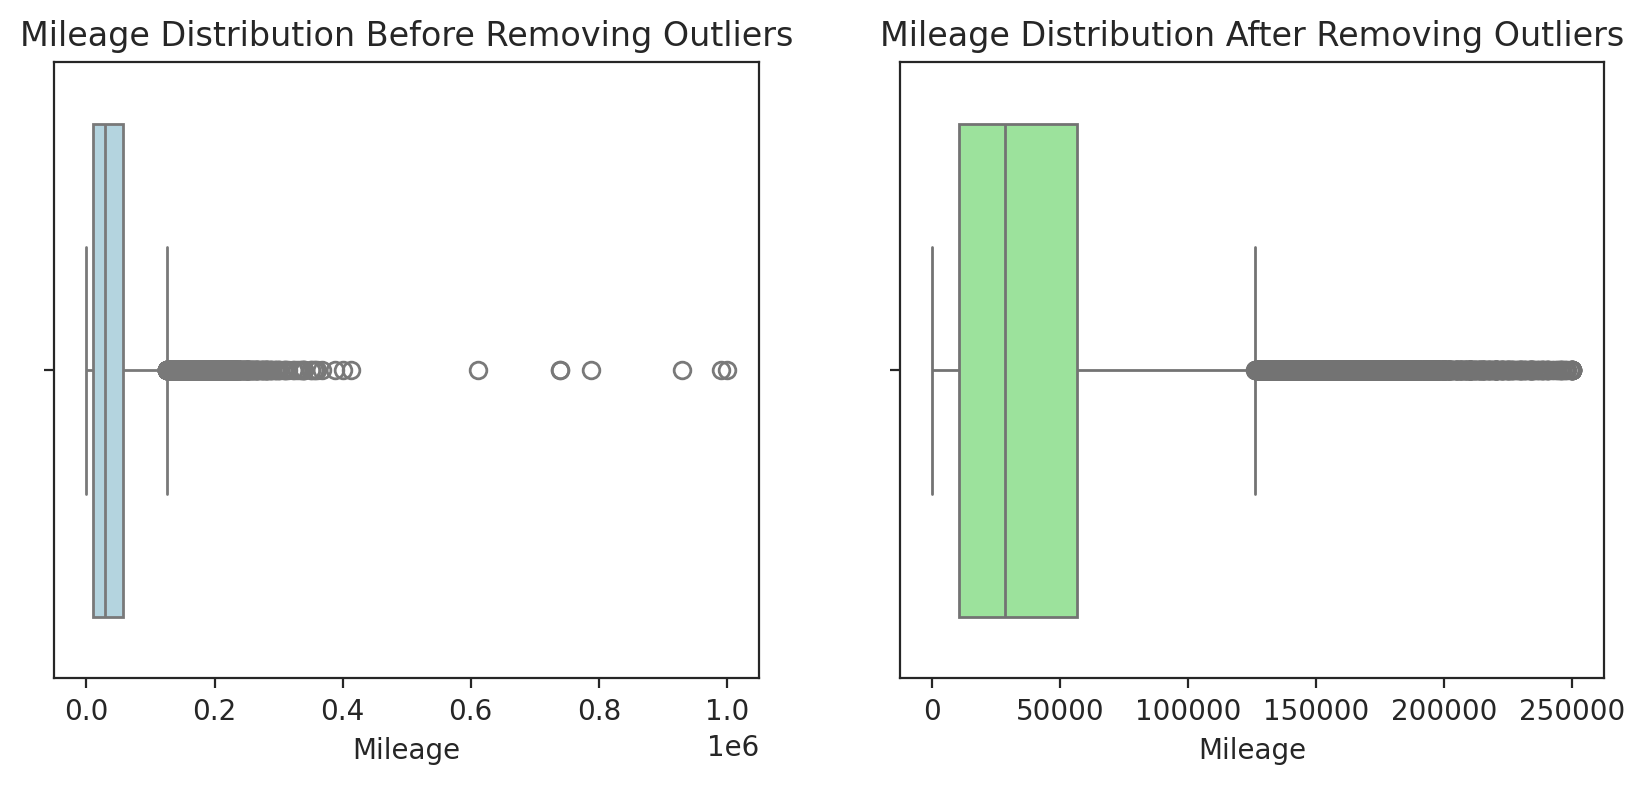

In [68]:
#limiting the mileage to 250,000 miles

original_mileage = at['mileage']
at = at[at['mileage'] <= 250000]

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=original_mileage, color='lightblue')
plt.title('Mileage Distribution Before Removing Outliers')
plt.xlabel('Mileage')

plt.subplot(1, 2, 2)
sns.boxplot(x=at['mileage'], color='lightgreen')
plt.title('Mileage Distribution After Removing Outliers')
plt.xlabel('Mileage')


Text(0.5, 0, 'Year')

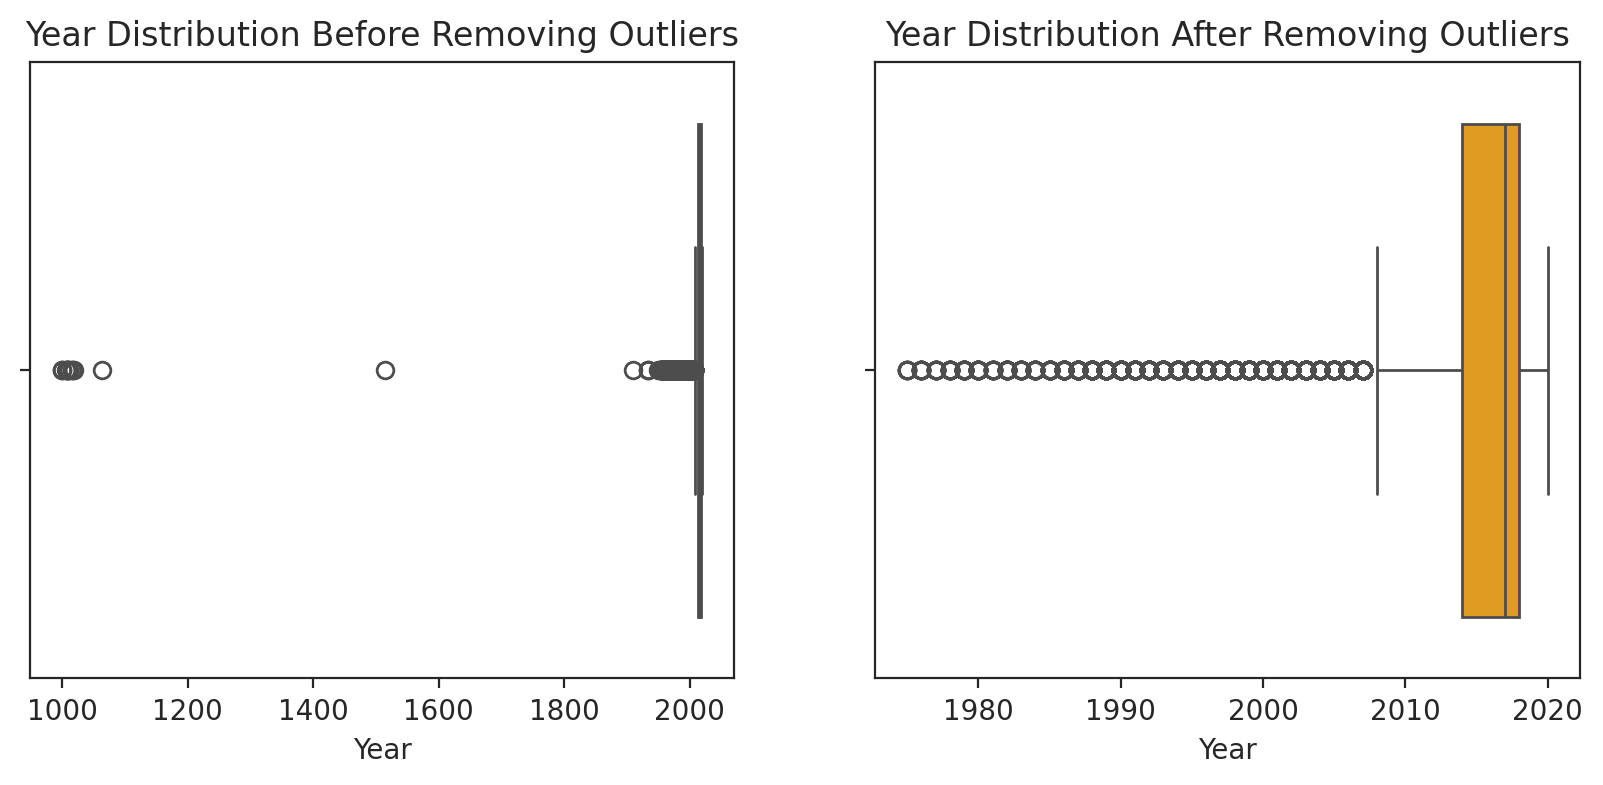

In [69]:
#limiting the year from 1975 to 2020

original_year = at['year_of_registration']
at = at[(at['year_of_registration'] >= 1975) & (at['year_of_registration'] <= 2020)]

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=original_year, color='cyan')
plt.title('Year Distribution Before Removing Outliers')
plt.xlabel('Year')

plt.subplot(1, 2, 2)
sns.boxplot(x=at['year_of_registration'], color='orange')
plt.title('Year Distribution After Removing Outliers')
plt.xlabel('Year')

In [70]:
at.describe()

,public_reference,mileage,reg_code,year_of_registration,price
count,4.016540e+05,401654.000000,367132.000000,401654.000000,4.016540e+05
mean,2.020069e+14,37675.651377,40.438741,2015.475693,1.729413e+04
std,1.680135e+10,34474.521095,25.204093,4.216519,4.620673e+04
min,2.013070e+14,0.000000,2.000000,1975.000000,1.200000e+02
25%,2.020090e+14,10487.250000,16.000000,2014.000000,7.495000e+03
50%,2.020090e+14,28634.000000,54.000000,2017.000000,1.260000e+04
75%,2.020100e+14,56780.000000,66.000000,2018.000000,2.000000e+04
max,2.020110e+14,250000.000000,95.000000,2020.000000,9.999999e+06


## **2.2. Feature Engineering, Data Transformations, Feature Selection**

In [71]:
#Dropping the unnecessary columns
at.drop(columns=['public_reference', 'reg_code', 'crossover_car_and_van', 'standard_model'], inplace=True)

In [72]:
at.head(1)

,mileage,standard_colour,standard_make,vehicle_condition,year_of_registration,price,body_type,fuel_type
0,0.0,Grey,Volvo,NEW,2020.0,73970,SUV,Petrol Plug-in Hybrid


In [73]:
at.isnull().sum()

,0
mileage,0
standard_colour,0
standard_make,0
vehicle_condition,0
year_of_registration,0
price,0
body_type,0
fuel_type,0


In [74]:
#creating age feature
current_year = at['year_of_registration'].max()
at['age_of_vehicle'] = current_year - at['year_of_registration']
at = at.drop(columns=['year_of_registration'])

In [75]:
at.head(4)

,mileage,standard_colour,standard_make,vehicle_condition,price,body_type,fuel_type,age_of_vehicle
0,0.0,Grey,Volvo,NEW,73970,SUV,Petrol Plug-in Hybrid,0.0
1,108230.0,Blue,Jaguar,USED,7000,Saloon,Diesel,9.0
2,7800.0,Grey,SKODA,USED,14000,SUV,Petrol,3.0
3,45000.0,Brown,Vauxhall,USED,7995,Hatchback,Diesel,4.0


In [76]:
at.describe()

,mileage,price,age_of_vehicle
count,401654.000000,4.016540e+05,401654.000000
mean,37675.651377,1.729413e+04,4.524307
std,34474.521095,4.620673e+04,4.216519
min,0.000000,1.200000e+02,0.000000
25%,10487.250000,7.495000e+03,2.000000
50%,28634.000000,1.260000e+04,3.000000
75%,56780.000000,2.000000e+04,6.000000
max,250000.000000,9.999999e+06,45.000000


In [77]:
at.head()

,mileage,standard_colour,standard_make,vehicle_condition,price,body_type,fuel_type,age_of_vehicle
0,0.0,Grey,Volvo,NEW,73970,SUV,Petrol Plug-in Hybrid,0.0
1,108230.0,Blue,Jaguar,USED,7000,Saloon,Diesel,9.0
2,7800.0,Grey,SKODA,USED,14000,SUV,Petrol,3.0
3,45000.0,Brown,Vauxhall,USED,7995,Hatchback,Diesel,4.0
4,64000.0,Grey,Land Rover,USED,26995,SUV,Diesel,5.0


**Data Encoding**

In [78]:
sd = at.sample(frac=0.50, random_state=42)

In [79]:
sd.shape

(200827, 8)

In [80]:
sd.head()

,mileage,standard_colour,standard_make,vehicle_condition,price,body_type,fuel_type,age_of_vehicle
293605,9546.0,Grey,Volkswagen,USED,24998,SUV,Diesel,1.0
19744,109210.0,Silver,Audi,USED,3490,Hatchback,Diesel,9.0
354498,12718.0,Red,Toyota,USED,7499,Hatchback,Petrol,4.0
223312,59547.0,Black,Audi,USED,18500,Estate,Diesel,4.0
202908,10.0,White,SEAT,USED,14300,Hatchback,Petrol,0.0


In [81]:
sd.describe()

,mileage,price,age_of_vehicle
count,200827.000000,2.008270e+05,200827.000000
mean,37684.063015,1.739810e+04,4.524954
std,34441.225644,5.668393e+04,4.205696
min,0.000000,1.500000e+02,0.000000
25%,10500.000000,7.495000e+03,2.000000
50%,28693.000000,1.259900e+04,3.000000
75%,56700.000000,1.999900e+04,6.000000
max,250000.000000,9.999999e+06,45.000000


In [82]:
sd.describe(include='object')

,standard_colour,standard_make,vehicle_condition,body_type,fuel_type
count,200827,200827,200827,200827,200827
unique,22,88,2,16,8
top,Black,BMW,USED,Hatchback,Petrol
freq,43762,18588,185213,83852,108462


Original dataset shape: (200827, 8)
Dataset shape after removing outliers: (187847, 8)


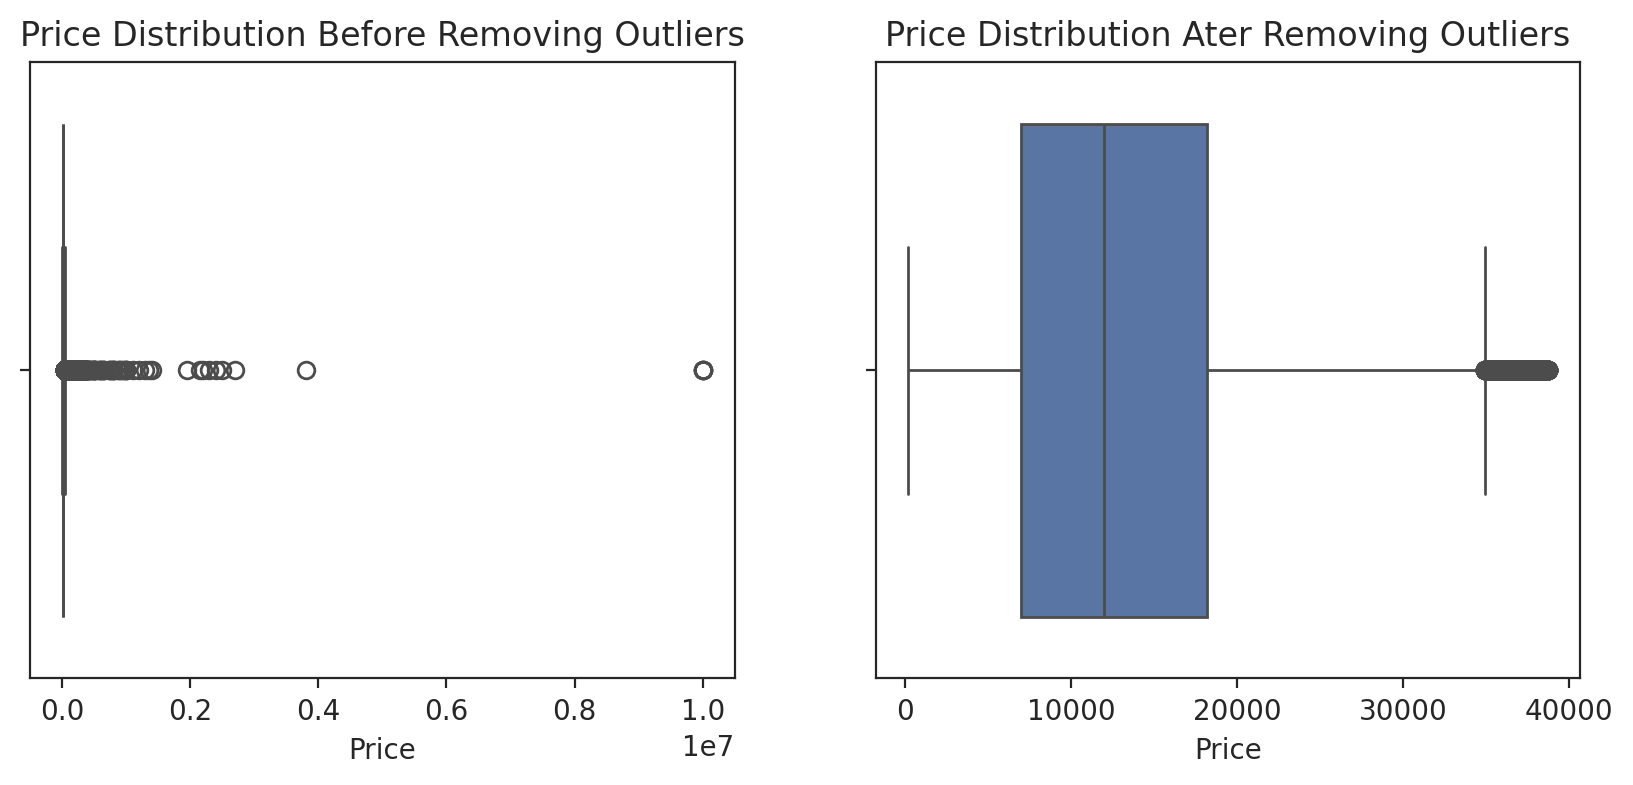

In [83]:
#applying IQR to price
sd_original_mileage = sd['mileage']

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data=sd, x='price')
plt.title("Price Distribution Before Removing Outliers")
plt.xlabel('Price')


Q1 = sd['price'].quantile(0.25)
Q3 = sd['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

sd_no_outliers = sd[(sd['price'] >= lower_bound) & (sd['price'] <= upper_bound)]

plt.subplot(1, 2, 2)
sns.boxplot(data=sd_no_outliers, x='price')
plt.title('Price Distribution Ater Removing Outliers')
plt.xlabel('Price')

print(f"Original dataset shape: {sd.shape}")
print(f"Dataset shape after removing outliers: {sd_no_outliers.shape}")

In [84]:
sd_no_outliers.describe()

,mileage,price,age_of_vehicle
count,187847.000000,187847.000000,187847.000000
mean,39617.627042,13454.295144,4.710435
std,34577.593346,8332.624948,4.176299
min,0.000000,150.000000,0.000000
25%,12634.500000,7000.000000,2.000000
50%,30816.000000,11990.000000,4.000000
75%,59000.000000,18180.500000,7.000000
max,250000.000000,38755.000000,45.000000


In [85]:
columns = ['fuel_type', 'body_type', 'vehicle_condition', 'standard_make', 'standard_colour']

ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

ed_data = ohe.fit_transform(sd_no_outliers[columns])
ed_feature_names = ohe.get_feature_names_out(columns)

ed_df = pd.DataFrame(ed_data, columns=ed_feature_names)

at_data_encoded = pd.concat([sd_no_outliers,ed_df], axis = 1)
at_data_encoded.drop(columns = columns, inplace = True )

In [86]:
at_data_encoded.head()

,mileage,price,age_of_vehicle,fuel_type_Diesel,fuel_type_Diesel Hybrid,fuel_type_Diesel Plug-in Hybrid,fuel_type_Electric,fuel_type_Petrol,fuel_type_Petrol Hybrid,fuel_type_Petrol Plug-in Hybrid,...,standard_colour_Multicolour,standard_colour_Navy,standard_colour_Orange,standard_colour_Pink,standard_colour_Purple,standard_colour_Red,standard_colour_Silver,standard_colour_Turquoise,standard_colour_White,standard_colour_Yellow
293605,9546.0,24998,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19744,109210.0,3490,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
354498,12718.0,7499,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
223312,59547.0,18500,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202908,10.0,14300,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [87]:
X = at_data_encoded.drop(columns=['price'])
y = at_data_encoded['price']

In [88]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

In [90]:
X_train.shape

(131492, 123)

In [91]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=25)
fit = rfe.fit(X_train, y_train)

features_selection = X.columns[fit.support_]
print("Selected Features:\n", features_selection)

Selected Features:
 Index(['mileage', 'age_of_vehicle', 'fuel_type_Diesel', 'fuel_type_Petrol',
       'fuel_type_Petrol Hybrid', 'body_type_Convertible', 'body_type_Coupe',
       'body_type_Estate', 'body_type_Hatchback', 'body_type_MPV',
       'body_type_SUV', 'body_type_Saloon', 'vehicle_condition_USED',
       'standard_make_Aston Martin', 'standard_make_Audi', 'standard_make_BMW',
       'standard_make_Bentley', 'standard_make_Dacia', 'standard_make_Jaguar',
       'standard_make_Land Rover', 'standard_make_Lexus',
       'standard_make_Mercedes-Benz', 'standard_make_Porsche',
       'standard_make_Volkswagen', 'standard_make_Volvo'],
      dtype='object')


In [93]:
X_selected = at_data_encoded[features_selection]
X_sample, _, y_sample, _ = train_test_split(X_selected, y, train_size=150000, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)

In [100]:
X_selected.head()

,mileage,age_of_vehicle,fuel_type_Diesel,fuel_type_Petrol,fuel_type_Petrol Hybrid,body_type_Convertible,body_type_Coupe,body_type_Estate,body_type_Hatchback,body_type_MPV,...,standard_make_BMW,standard_make_Bentley,standard_make_Dacia,standard_make_Jaguar,standard_make_Land Rover,standard_make_Lexus,standard_make_Mercedes-Benz,standard_make_Porsche,standard_make_Volkswagen,standard_make_Volvo
293605,9546.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19744,109210.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
354498,12718.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223312,59547.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202908,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **3. Model Building**

## **3.1. Algorithm Selection, Model Instantiation and Configuration**

In [97]:
knn = KNeighborsRegressor(n_neighbors=5)
print(knn)

KNeighborsRegressor()


In [101]:
decision_tree = DecisionTreeRegressor(random_state=42)
print(decision_tree)

DecisionTreeRegressor(random_state=42)


In [102]:
linear_reg = LinearRegression()
print(linear_reg)

LinearRegression()


## **3.2. Grid Search, and Model Ranking and Selection**

In [92]:
#KNN model
knnscaler = StandardScaler()
X_train_scaled_knn = scaler.fit_transform(X_train)
X_test_scaled_knn = scaler.transform(X_test)
knn_para = {'n_neighbors': [5,7,9,11]}
knn_grid_search = GridSearchCV(knn, knn_para, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [93]:
knn_grid_search.fit(X_train_scaled_knn, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 7, 9, 11]},
             scoring='neg_mean_squared_error')

In [94]:
knn_best_est = knn_grid_search.best_estimator_
knn_pred = knn_best_est.predict(X_test_scaled_knn)
knn_best_hyp = knn_grid_search.best_params_
knn_mse = mean_squared_error(y_test, knn_pred)
knn_rmse = np.sqrt(knn_mse)
knn_r2 = r2_score(y_test, knn_pred)
print(f"Best Hyperarameters: {knn_best_hyp}")
print(f"MSE: {knn_mse}")
print(f"RMSE: {knn_rmse}")
print(f"R²: {knn_r2}")

Best Hyperarameters: {'n_neighbors': 11}
MSE: 12896982.381346924
RMSE: 3591.236887389486
R²: 0.8111677604689406


In [95]:
#DT model
dt_para = {'max_depth': [5, 10, 15, 20]}
dt_grid_search = GridSearchCV(decision_tree, dt_para, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [96]:
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20]},
             scoring='neg_mean_squared_error')

In [97]:
dt_best_est = dt_grid_search.best_estimator_
dt_pred = dt_best_est.predict(X_test)
dt_best_hyp = dt_grid_search.best_params_
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_pred)

print(f"Best Parameters: {dt_best_hyp}")
print(f"Decision Tree MSE: {dt_mse}")
print(f"Decision Tree RMSE: {dt_rmse}")
print(f"Decision Tree R²: {dt_r2}")

Best Parameters: {'max_depth': 15}
Decision Tree MSE: 14806067.409781057
Decision Tree RMSE: 3847.865305566329
Decision Tree R²: 0.7832157333423606


In [98]:
#Linear regressor
linear_reg.fit(X_train, y_train)

LinearRegression()

In [99]:
lr_pred = linear_reg.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_pred)

print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Linear Regression R²: {lr_r2}")

Linear Regression MSE: 18666028.05810669
Linear Regression RMSE: 4320.419893726383
Linear Regression R²: 0.726699798670752


In [100]:
#Model ranking
eva_results = {
    "Model": ["kNN", "Decision Tree", "Linear Regression"],
    "RMSE": [knn_rmse, dt_rmse, lr_rmse],
    "R²": [knn_r2, dt_r2, lr_r2]
}

results_df = pd.DataFrame(eva_results)
results_df["Rank"] = results_df["RMSE"].rank(ascending=True)

print("Ranked Models:")
results_df

Ranked Models:


,Model,RMSE,R²,Rank
0,kNN,3591.236887,0.811168,1.0
1,Decision Tree,3847.865306,0.783216,2.0
2,Linear Regression,4320.419894,0.726700,3.0


In [101]:
best_model = results_df.loc[results_df['RMSE'].idxmin(), 'Model']
print(f"Best Model is: {best_model}")

Best Model is: kNN


# **4. Model Evaluation and Analysis**

## **4.1. Coarse-Grained Evaluation/Analysis**

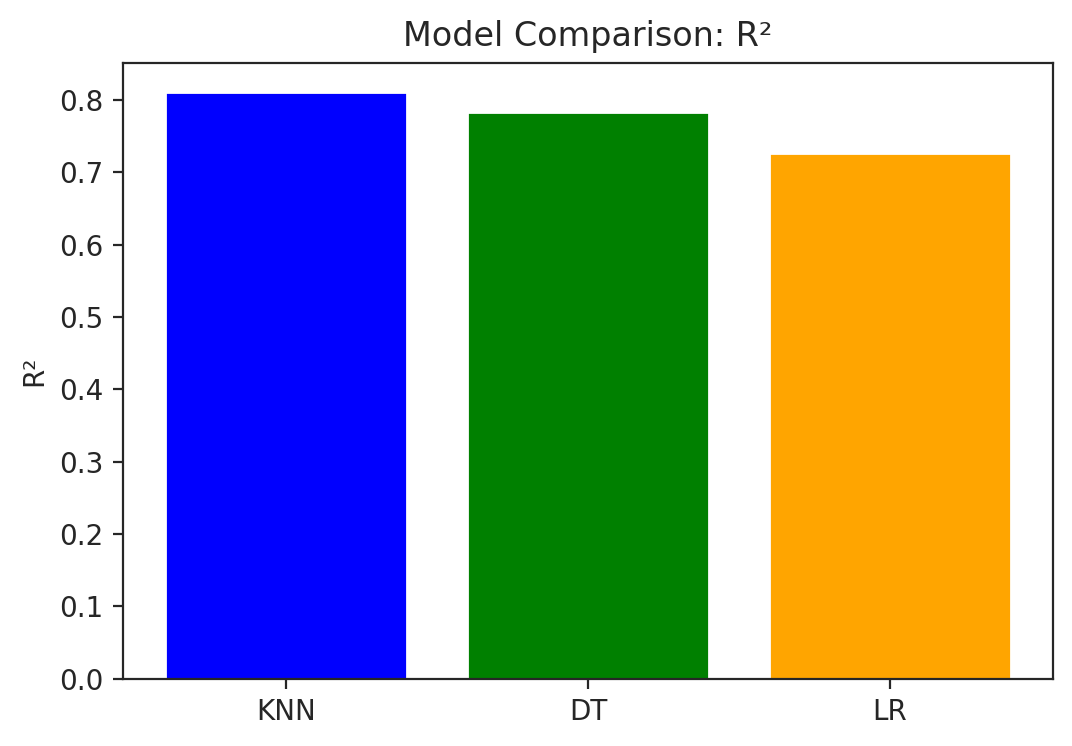

In [102]:
# Visualization for KNN
plt.bar(["KNN", "DT","LR"], [knn_r2, dt_r2, lr_r2], color=['blue', 'green','orange'])
plt.title('Model Comparison: R²')
plt.ylabel('R²')
plt.show()

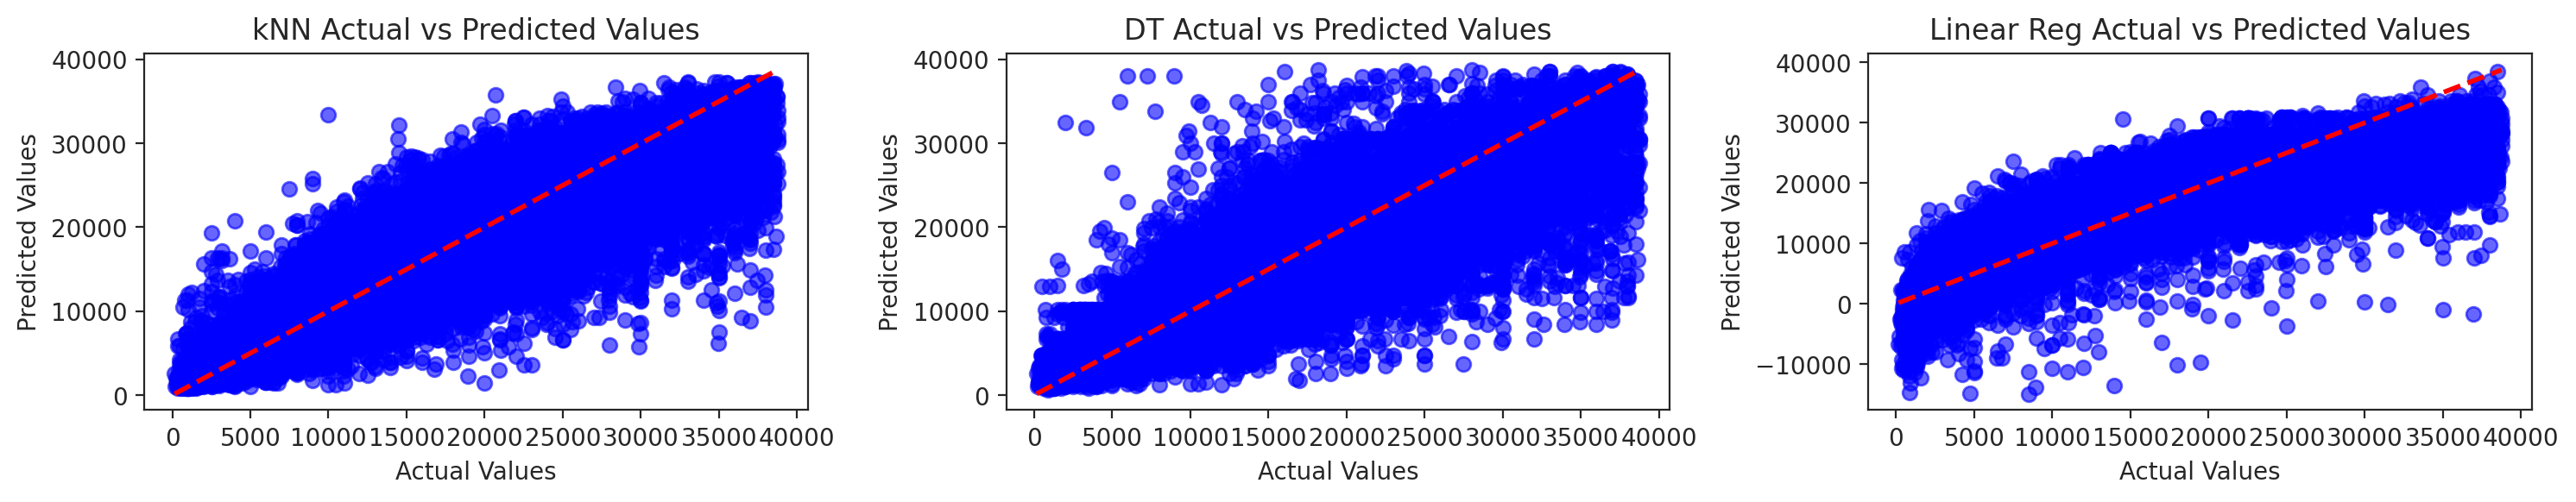

In [103]:
plt.figure(figsize=(15, 3))

plt.subplot(1, 3, 1)
plt.scatter(y_test, knn_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("kNN Actual vs Predicted Values")

plt.subplot(1, 3, 2)
plt.scatter(y_test, dt_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("DT Actual vs Predicted Values")

plt.subplot(1, 3, 3)
plt.scatter(y_test, lr_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Reg Actual vs Predicted Values")

plt.tight_layout(pad=1.0)

Text(0.5, 1.0, ' Linear Reg Prediction Distribution')

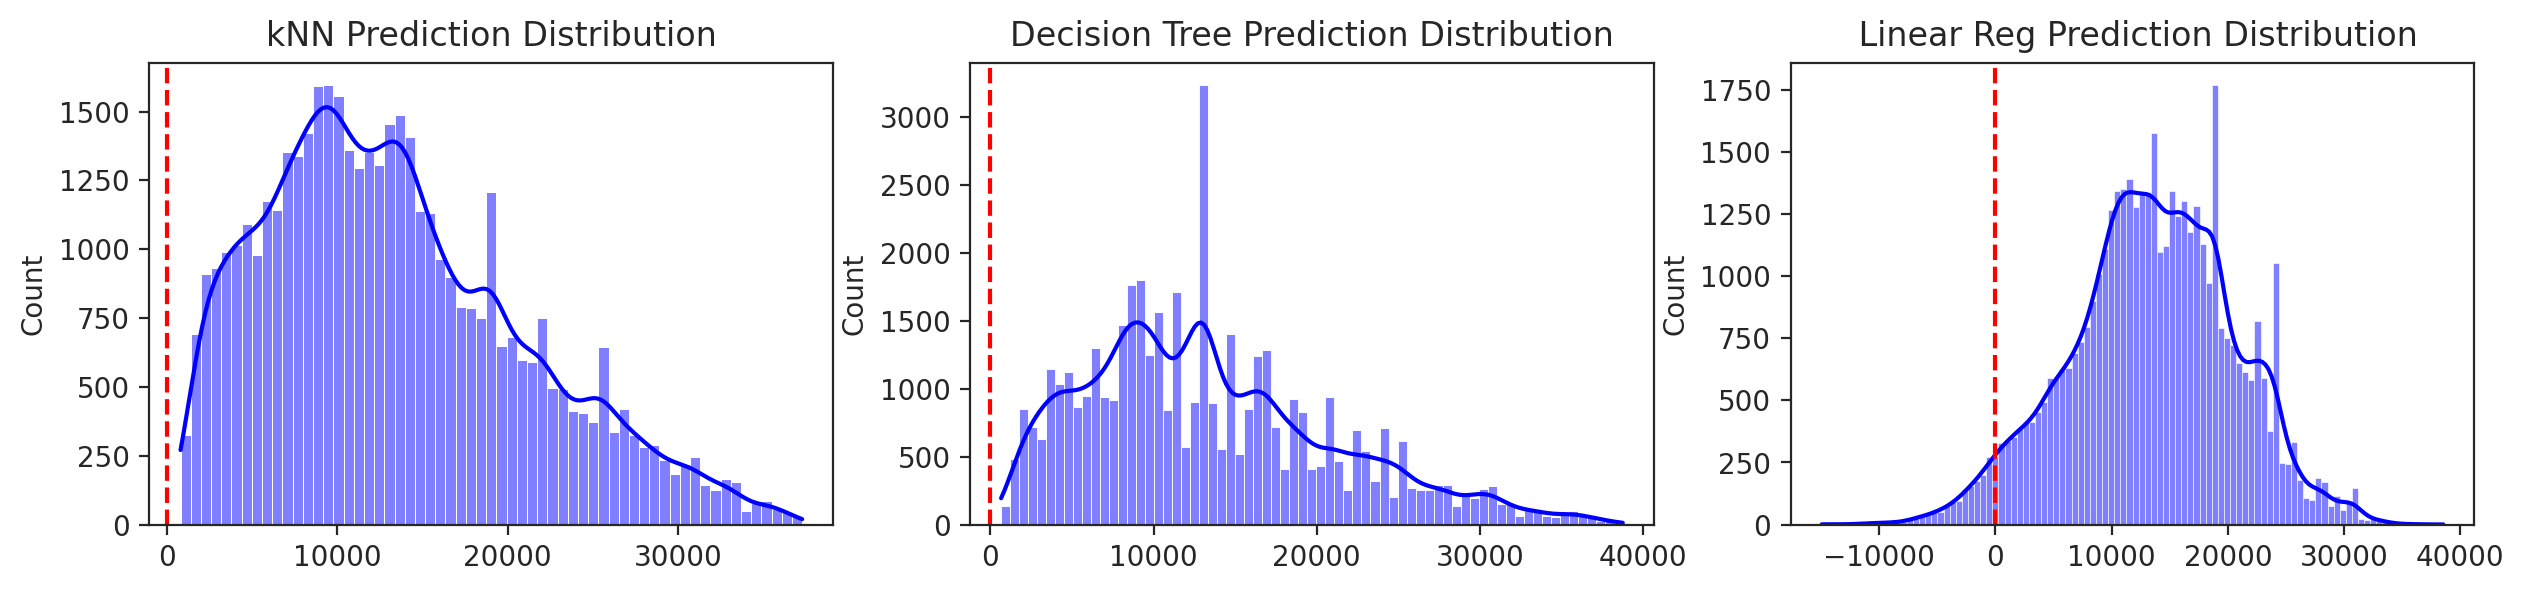

In [104]:
plt.figure(figsize=(15, 3))
plt.subplot(1, 3, 1)
sns.histplot(knn_pred, kde=True, color='blue')
plt.axvline(0, color='red', linestyle='--')
plt.title("kNN Prediction Distribution")

plt.subplot(1, 3, 2)
sns.histplot(dt_pred, kde=True, color='blue')
plt.axvline(0, color='red', linestyle='--')
plt.title("Decision Tree Prediction Distribution")

plt.subplot(1, 3, 3)
sns.histplot(lr_pred, kde=True, color='blue')
plt.axvline(0, color='red', linestyle='--')
plt.title(" Linear Reg Prediction Distribution")

## **4.2. Feature Importance**

Text(0.5, 1.0, 'Feature Importance - Decision Tree')

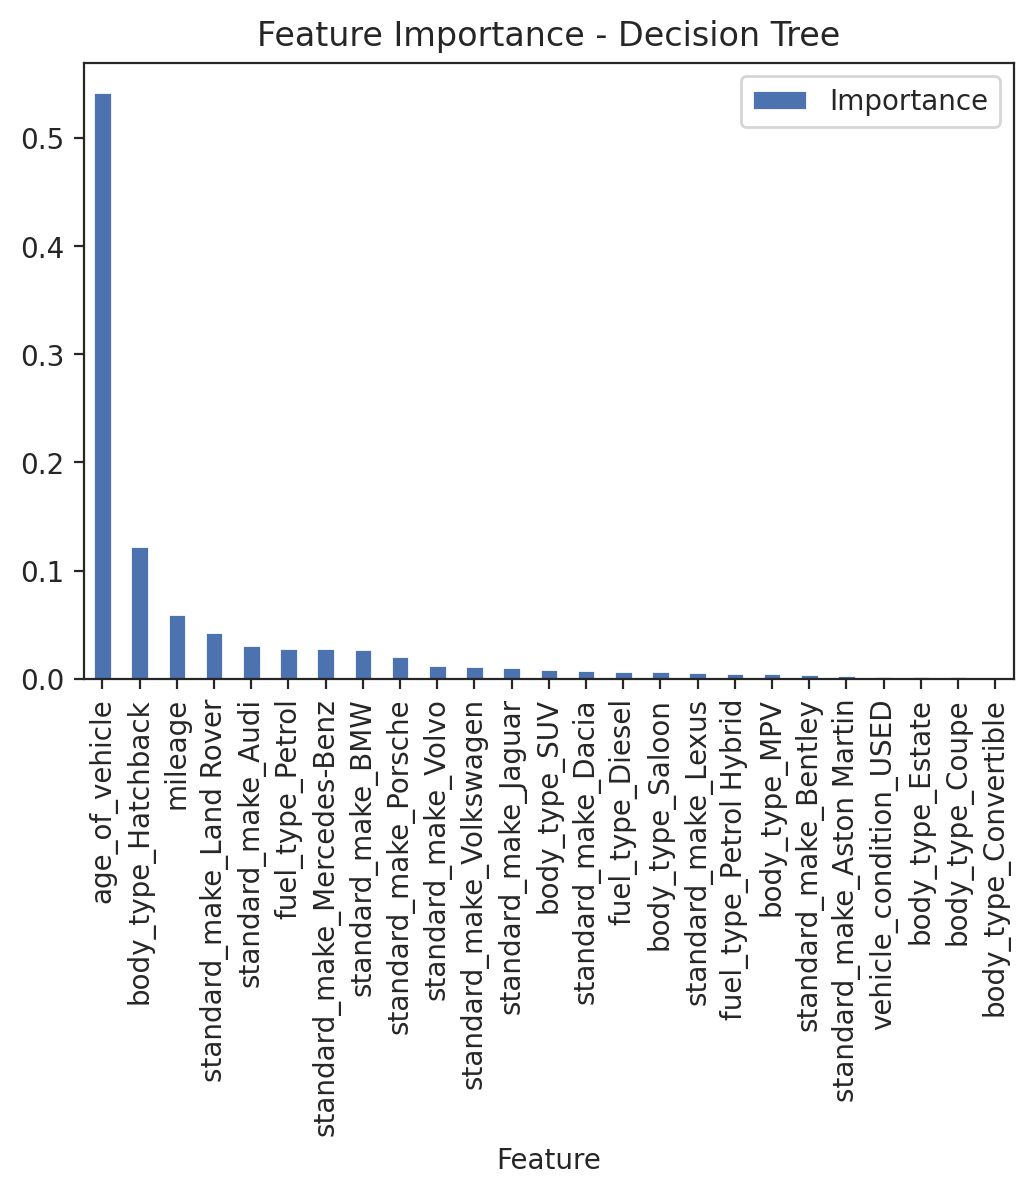

In [105]:
dt_feature = dt_best_est.feature_importances_
importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": dt_feature})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

importance_df.plot(kind="bar", x="Feature", y="Importance")
plt.title("Feature Importance - Decision Tree")

                        Feature   Coefficient
13   standard_make_Aston Martin  26552.701546
16        standard_make_Bentley  22087.160556
22        standard_make_Porsche  18174.224477
19     standard_make_Land Rover  11606.502210
8           body_type_Hatchback  -9063.806720
18         standard_make_Jaguar   8739.403447
21  standard_make_Mercedes-Benz   7389.076285
9                 body_type_MPV  -7117.069923
3              fuel_type_Petrol  -6887.033860
15            standard_make_BMW   6781.734462
14           standard_make_Audi   6631.142772
24          standard_make_Volvo   6568.167596
2              fuel_type_Diesel  -6474.115025
11             body_type_Saloon  -6438.306969
17          standard_make_Dacia  -5800.037864
7              body_type_Estate  -5763.227958
20          standard_make_Lexus   5620.936082
5         body_type_Convertible  -5432.208240
6               body_type_Coupe  -5243.729895
12       vehicle_condition_USED  -5050.753074
10                body_type_SUV  -

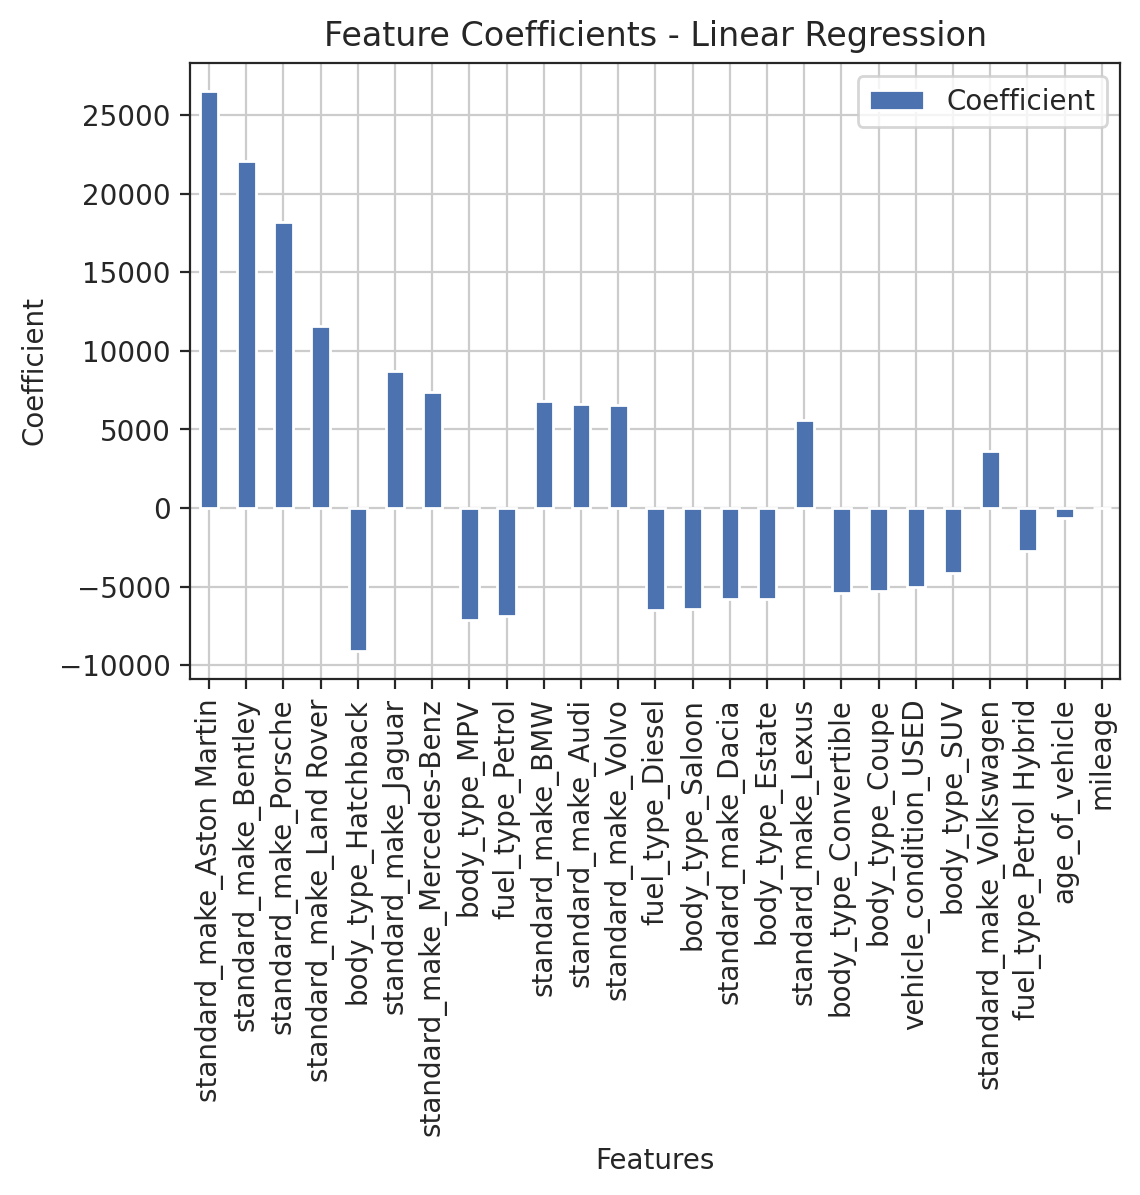

In [106]:
coefficients = linear_reg.coef_
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": coefficients
})

# Sort by absolute magnitude of coefficients
feature_importance_df["Abs_Coefficient"] = feature_importance_df["Coefficient"].abs()
feature_importance_df = feature_importance_df.sort_values(by="Abs_Coefficient", ascending=False)

# Print the top features
print(feature_importance_df[["Feature", "Coefficient"]])

feature_importance_df.plot(kind="bar", x="Feature", y="Coefficient")
plt.title("Feature Coefficients - Linear Regression")
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.grid()
plt.show()


## **4.3. Fine-Grained Evaluation**

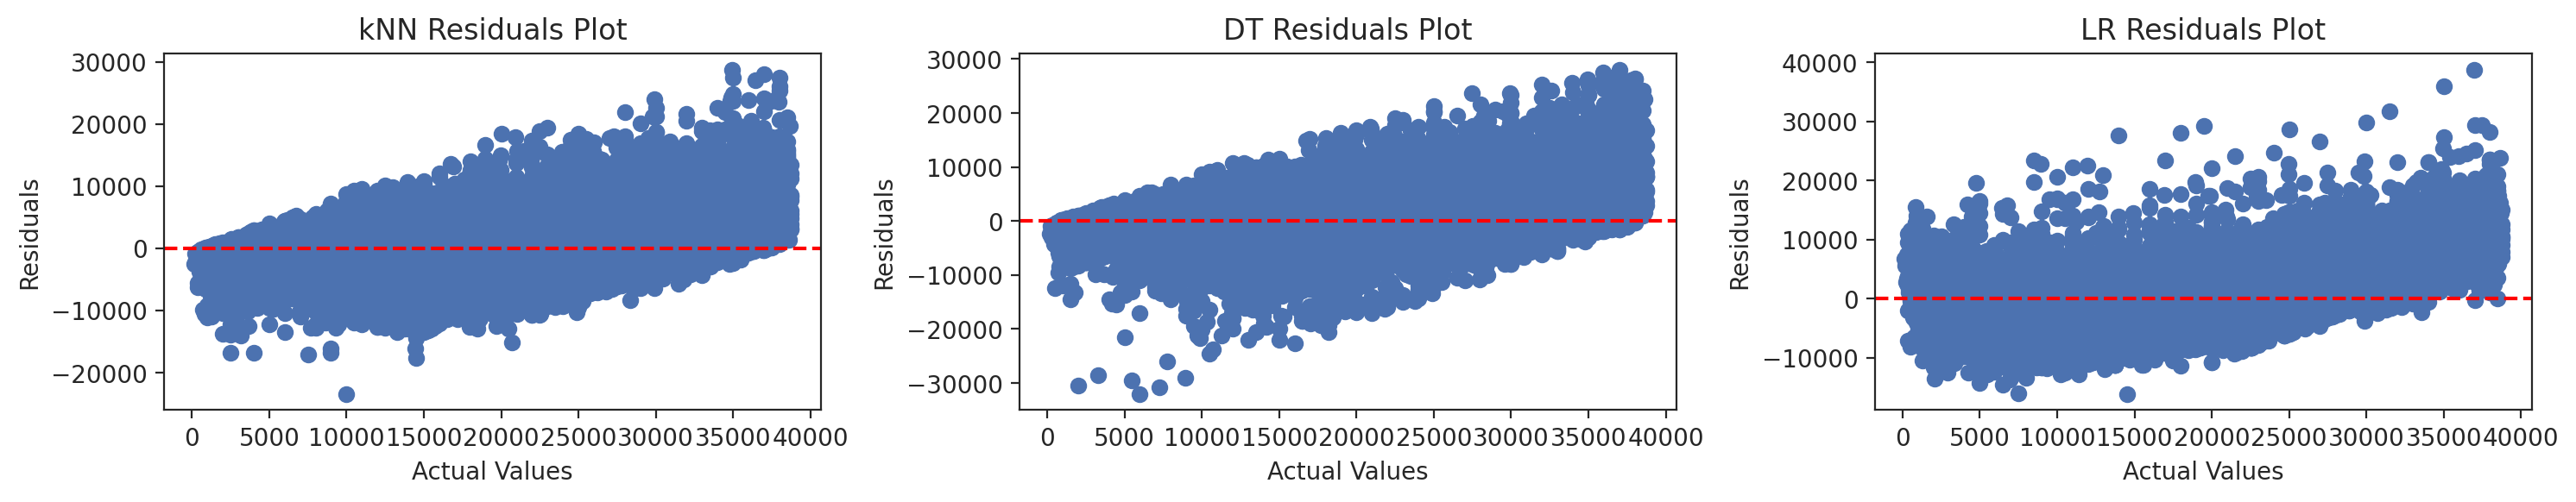

In [107]:
plt.figure(figsize=(15, 3))
plt.subplot(1, 3, 1)
residuals = y_test - knn_pred
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("kNN Residuals Plot")

plt.subplot(1, 3, 2)
residuals = y_test - dt_pred
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("DT Residuals Plot")

plt.subplot(1, 3, 3)
residuals = y_test - lr_pred
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("LR Residuals Plot")

plt.tight_layout(pad=1.0)


In [108]:
comparison_df = pd.DataFrame({
    "Actual Value": y_test,
    "kNN Predicted": knn_pred,
    "kNN Residual": y_test - knn_pred,
    "Decision Tree Predicted": dt_pred,
    "Decision Tree Residual": y_test - dt_pred,
    "Linear Regression Predicted": lr_pred,
    "Linear Regression Residual": y_test - lr_pred
})
comparison_df

,Actual Value,kNN Predicted,kNN Residual,Decision Tree Predicted,Decision Tree Residual,Linear Regression Predicted,Linear Regression Residual
120176,8999,13873.363636,-4874.363636,11619.561285,-2620.561285,14220.197512,-5221.197512
105644,15499,16394.000000,-895.000000,17061.803030,-1562.803030,17436.059658,-1937.059658
180345,13400,15479.818182,-2079.818182,16600.000000,-3200.000000,16182.309642,-2782.309642
208691,9798,10756.454545,-958.454545,11719.506438,-1921.506438,12093.762393,-2295.762393
156103,6495,5995.181818,499.818182,6518.584906,-23.584906,6234.535683,260.464317
...,...,...,...,...,...,...,...
71213,22890,23357.181818,-467.181818,24245.167347,-1355.167347,21961.327355,928.672645
270946,11949,14465.545455,-2516.545455,11795.000000,154.000000,13680.122916,-1731.122916
342335,9995,11217.090909,-1222.090909,10208.251133,-213.251133,11205.292043,-1210.292043
214211,32950,32926.818182,23.181818,33032.352941,-82.352941,23634.521682,9315.478318
